In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler 




In [358]:
#IMPORT TRE DATA
data=pd.read_csv('Dataframe_Study2_ECGsignal.csv')

In [359]:
df=pd.DataFrame(data)
df

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1,472,633.067797,95.111328,5.596500,14.685775,38.126336,19.698201,13.142063,1.910828,...,9.060048,35.557355,64.442645,0.551767,15674.539755,13.928721,52.054050,3.737174,1.196584,-1.0
1,1,282,633.797872,94.957639,5.295495,15.437722,34.964419,19.589561,12.080853,1.067616,...,9.108754,35.414741,64.585259,0.548341,16393.972788,13.851732,47.446242,3.425293,1.391884,208.0
2,1,274,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774,308.0
3,2,438,682.826484,88.128099,4.771772,16.157895,37.144495,20.816458,13.139347,2.059497,...,9.060304,36.066585,63.933415,0.564127,15815.174364,14.719457,50.414864,3.425049,1.435334,-1.0
4,2,268,666.746269,90.255192,4.875405,15.198502,36.593564,19.099385,11.588573,1.123596,...,9.121223,35.383463,64.616537,0.547591,16590.789950,13.500916,49.575219,3.671989,1.423566,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,185,347,515.818444,116.845725,7.384019,11.962428,37.752447,23.626856,20.404213,1.734104,...,9.105778,34.654331,65.345669,0.530323,16147.875484,16.706709,50.518112,3.023822,0.906509,208.0
554,185,324,550.521605,109.223667,4.937727,13.167183,26.510752,17.750856,11.923015,1.547988,...,9.094684,35.006366,64.993634,0.538612,16082.202403,12.551746,35.237809,2.807403,1.118727,309.0
555,186,390,764.643590,78.587904,3.107465,14.753213,29.648908,18.342430,10.913000,0.514139,...,9.075834,35.652062,64.347938,0.554051,15954.796546,12.969918,39.699427,3.060885,1.588712,-1.0
556,186,232,766.500000,78.477504,4.015693,15.614719,38.337192,19.157018,11.122384,0.865801,...,9.157152,35.052305,64.947695,0.539701,17076.379939,13.544685,52.275968,3.859519,1.304293,209.0


In [360]:
df.isnull().sum()

Patien ID               0
NNI counter             0
NNI mean                0
HR mean                 0
HR std                  0
NNI diff mean           0
SDNN                    0
RMSSD                   0
SDSD                    0
pnn50                   0
pnn20                   0
TRI Index               0
Welch LogPower VLF      0
Welch LogPower LF       0
Welch LogPower HF       0
Welch NormPower LF      0
Welch NormPower HF      0
Welch LF/HF             0
Welch TotPower          0
AutoReg LogPower VLF    0
AutoReg LogPower LF     0
AutoReg LogPower HF     0
AutoReg NormPower LF    0
AutoReg NormPower HF    0
AutoReg LF/HF           0
AutoReg TotPower        0
SD1                     0
SD2                     0
SD1/SD2                 0
SampEntropy             0
Label                   0
dtype: int64

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patien ID             558 non-null    int64  
 1   NNI counter           558 non-null    int64  
 2   NNI mean              558 non-null    float64
 3   HR mean               558 non-null    float64
 4   HR std                558 non-null    float64
 5   NNI diff mean         558 non-null    float64
 6   SDNN                  558 non-null    float64
 7   RMSSD                 558 non-null    float64
 8   SDSD                  558 non-null    float64
 9   pnn50                 558 non-null    float64
 10  pnn20                 558 non-null    float64
 11  TRI Index             558 non-null    float64
 12  Welch LogPower VLF    558 non-null    float64
 13  Welch LogPower LF     558 non-null    float64
 14  Welch LogPower HF     558 non-null    float64
 15  Welch NormPower LF    5

In [362]:
# KEEPING ALL DATATYPES AS FLOAT   
df['Patien ID']  = df['Patien ID'].astype('float64')
df['NNI counter']  = df['NNI counter'].astype('float64')

In [363]:
df.columns

Index(['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std',
       'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index',
       'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF',
       'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF',
       'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF',
       'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF',
       'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2',
       'SampEntropy', 'Label'],
      dtype='object')

In [364]:
df.columns[:].duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [365]:
df[df.duplicated()]

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label


In [366]:
df['Label'].unique()

array([ -1., 208., 308., 108., 209., 309.])

In [367]:
df.describe()

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,...,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,93.500000,289.931900,767.676992,80.384865,5.954062,27.490272,56.871373,36.866079,24.202769,14.470367,...,9.150015,35.163188,64.836812,0.542508,16999.395588,26.067023,75.305377,3.282965,1.370430,150.440860
std,53.740976,83.195142,114.909031,11.959229,2.439091,16.309425,23.277093,22.604379,16.311192,14.808198,...,0.055289,0.692332,0.692332,0.016349,748.461106,15.983550,30.081744,1.134020,0.299663,120.950288
min,1.000000,148.000000,485.635870,50.200617,1.656220,3.062389,14.800060,4.139717,2.787990,0.000000,...,8.977563,32.085111,63.080494,0.472431,14759.473032,2.927152,20.689912,0.993444,0.434453,-1.000000
25%,47.000000,226.000000,687.910677,71.858582,4.304620,16.896592,40.730706,22.281171,14.207657,2.604377,...,9.111860,34.736325,64.362928,0.532246,16502.673882,15.754493,54.157198,2.529560,1.170820,-1.000000
50%,93.500000,262.000000,760.302772,79.390871,5.591812,23.877990,53.319584,31.546890,20.454310,9.394732,...,9.148462,35.256801,64.743199,0.544564,17000.851578,22.306598,71.115883,3.072751,1.404620,208.000000
75%,140.000000,350.750000,839.108451,87.583359,7.121336,34.169540,69.687088,45.354272,29.216750,22.083135,...,9.185941,35.637072,65.263675,0.553689,17489.613053,32.070242,93.349325,3.868117,1.577114,209.000000
max,186.000000,562.000000,1216.673469,124.129109,30.915960,150.074830,179.144520,193.165732,123.741493,77.551020,...,9.340415,36.919506,67.914889,0.585276,19831.771611,136.583463,229.121154,7.675648,2.227862,309.000000


In [368]:
df.iloc[:,-1:]

,Label
0,-1.0
1,208.0
2,308.0
3,-1.0
4,208.0
...,...
553,208.0
554,309.0
555,-1.0
556,209.0


In [369]:
df.columns

Index(['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std',
       'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index',
       'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF',
       'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF',
       'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF',
       'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF',
       'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2',
       'SampEntropy', 'Label'],
      dtype='object')

In [370]:
# CHECKING OUTLIERS

def outliers_detected(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_fence= Q1 - 1.5 * IQR
    upper_fence= Q3 + 1.5 * IQR
    out_liers=df.index[np.logical_or(df[column]<lower_fence,
                                      df[column]>upper_fence)]
    return out_liers
    
    
# outliers detected  now we need to remove them 
outliers=[outliers_detected(df,df.columns[i]) for i in range(len(df.columns[:-1]))]

out=pd.Series(outliers,df.columns[:-1] )
print(len(outliers),df.shape)
out

30 (558, 31)


Patien ID                                   Int64Index([], dtype='int64')
NNI counter                    Int64Index([192, 216, 552], dtype='int64')
NNI mean                Int64Index([48, 49, 50, 426, 428, 488, 507, 50...
HR mean                 Int64Index([76, 216, 217, 218, 223, 289, 355, ...
HR std                  Int64Index([67, 160, 165, 166, 167, 169, 280, ...
NNI diff mean           Int64Index([ 48,  49,  50,  66,  67, 152, 165,...
SDNN                    Int64Index([48, 49, 50, 96, 97, 98, 165, 167, ...
RMSSD                   Int64Index([ 48,  49,  50,  66,  67,  68, 165,...
SDSD                    Int64Index([ 48,  49,  50,  66,  67,  68, 165,...
pnn50                   Int64Index([48, 49, 50, 152, 231, 233, 235, 23...
pnn20                                       Int64Index([], dtype='int64')
TRI Index               Int64Index([50, 96, 97, 165, 168, 231, 233, 38...
Welch LogPower VLF      Int64Index([49, 65, 146, 250, 305], dtype='int...
Welch LogPower LF       Int64Index([48

In [371]:
for i in range(len(outliers)):
        df[df.columns[i]]=df[df.columns[i]].drop(outliers_detected(df,df.columns[i]))
        print(df[df.columns[i]])

0        1.0
1        1.0
2        1.0
3        2.0
4        2.0
       ...  
553    185.0
554    185.0
555    186.0
556    186.0
557    186.0
Name: Patien ID, Length: 558, dtype: float64
0      472.0
1      282.0
2      274.0
3      438.0
4      268.0
       ...  
553    347.0
554    324.0
555    390.0
556    232.0
557    236.0
Name: NNI counter, Length: 558, dtype: float64
0      633.067797
1      633.797872
2      653.729927
3      682.826484
4      666.746269
          ...    
553    515.818444
554    550.521605
555    764.643590
556    766.500000
557    755.105932
Name: NNI mean, Length: 558, dtype: float64
0       95.111328
1       94.957639
2       92.000089
3       88.128099
4       90.255192
          ...    
553           NaN
554    109.223667
555     78.587904
556     78.477504
557     79.574652
Name: HR mean, Length: 558, dtype: float64
0      5.596500
1      5.295495
2      4.418761
3      4.771772
4      4.875405
         ...   
553    7.384019
554    4.937727
555    3.10

In [373]:
df.isnull().sum()

Patien ID                0
NNI counter              3
NNI mean                 8
HR mean                  9
HR std                  16
NNI diff mean           18
SDNN                    15
RMSSD                   20
SDSD                    26
pnn50                   13
pnn20                    0
TRI Index               11
Welch LogPower VLF       5
Welch LogPower LF        6
Welch LogPower HF        9
Welch NormPower LF       5
Welch NormPower HF       5
Welch LF/HF             34
Welch TotPower          22
AutoReg LogPower VLF     8
AutoReg LogPower LF      5
AutoReg LogPower HF      8
AutoReg NormPower LF     8
AutoReg NormPower HF     8
AutoReg LF/HF            7
AutoReg TotPower         8
SD1                     20
SD2                     14
SD1/SD2                 18
SampEntropy              6
Label                    0
dtype: int64

In [374]:
df=df.fillna(df.median())


In [375]:
df.isnull().sum()

Patien ID               0
NNI counter             0
NNI mean                0
HR mean                 0
HR std                  0
NNI diff mean           0
SDNN                    0
RMSSD                   0
SDSD                    0
pnn50                   0
pnn20                   0
TRI Index               0
Welch LogPower VLF      0
Welch LogPower LF       0
Welch LogPower HF       0
Welch NormPower LF      0
Welch NormPower HF      0
Welch LF/HF             0
Welch TotPower          0
AutoReg LogPower VLF    0
AutoReg LogPower LF     0
AutoReg LogPower HF     0
AutoReg NormPower LF    0
AutoReg NormPower HF    0
AutoReg LF/HF           0
AutoReg TotPower        0
SD1                     0
SD2                     0
SD1/SD2                 0
SampEntropy             0
Label                   0
dtype: int64

In [460]:
DF=df.iloc[:,:-1]
DF

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy
0,1.0,472.0,633.067797,95.111328,5.596500,14.685775,38.126336,19.698201,13.142063,1.910828,...,8.465419,9.060048,35.557355,64.442645,0.551767,15674.539755,13.928721,52.054050,3.737174,1.196584
1,1.0,282.0,633.797872,94.957639,5.295495,15.437722,34.964419,19.589561,12.080853,1.067616,...,8.507896,9.108754,35.414741,64.585259,0.548341,16393.972788,13.851732,47.446242,3.425293,1.391884
2,1.0,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,8.515669,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774
3,2.0,438.0,682.826484,88.128099,4.771772,16.157895,37.144495,20.816458,13.139347,2.059497,...,8.487828,9.060304,36.066585,63.933415,0.564127,15815.174364,14.719457,50.414864,3.425049,1.435334
4,2.0,268.0,666.746269,90.255192,4.875405,15.198502,36.593564,19.099385,11.588573,1.123596,...,8.518998,9.121223,35.383463,64.616537,0.547591,16590.789950,13.500916,49.575219,3.671989,1.423566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,185.0,347.0,515.818444,79.276563,7.384019,11.962428,37.752447,23.626856,20.404213,1.734104,...,8.471510,9.105778,34.654331,65.345669,0.530323,16147.875484,16.706709,50.518112,3.023822,0.906509
554,185.0,324.0,550.521605,109.223667,4.937727,13.167183,26.510752,17.750856,11.923015,1.547988,...,8.475924,9.094684,35.006366,64.993634,0.538612,16082.202403,12.551746,35.237809,2.807403,1.118727
555,186.0,390.0,764.643590,78.587904,3.107465,14.753213,29.648908,18.342430,10.913000,0.514139,...,8.485337,9.075834,35.652062,64.347938,0.554051,15954.796546,12.969918,39.699427,3.060885,1.588712
556,186.0,232.0,766.500000,78.477504,4.015693,15.614719,38.337192,19.157018,11.122384,0.865801,...,8.540411,9.157152,35.052305,64.947695,0.539701,17076.379939,13.544685,52.275968,3.859519,1.304293


In [ ]:
# feature extraction

In [440]:
# THIS WILL FIND OUT THE LOW-VARIANCE FEATURES IN THE DATA , 
#this VarienceThreshold will say if their are any dublicate features in data ,output is true means the feature
#is having variance if Flase their is no variance between features  we can remove the feature 

from sklearn.feature_selection import VarianceThreshold
variance=VarianceThreshold(threshold=0.2).fit(DF)

In [441]:
correlated_feat=pd.Series(variance.get_support(),DF.columns)
correlated_feat

Patien ID                True
NNI counter              True
NNI mean                 True
HR mean                  True
HR std                   True
NNI diff mean            True
SDNN                     True
RMSSD                    True
SDSD                     True
pnn50                    True
pnn20                    True
TRI Index                True
Welch LogPower VLF       True
Welch LogPower LF        True
Welch LogPower HF        True
Welch NormPower LF       True
Welch NormPower HF       True
Welch LF/HF              True
Welch TotPower           True
AutoReg LogPower VLF    False
AutoReg LogPower LF     False
AutoReg LogPower HF     False
AutoReg NormPower LF     True
AutoReg NormPower HF     True
AutoReg LF/HF           False
AutoReg TotPower         True
SD1                      True
SD2                      True
SD1/SD2                  True
SampEntropy             False
dtype: bool

In [442]:
correlated_feat.sum()

25

In [422]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [443]:
vif = pd.DataFrame()
vif['features']=DF.columns
vif['vif factor']=[variance_inflation_factor(DF.values,i) for i in range (DF.shape[1])]

vif

/Users/luigitesta/anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif factor
0,Patien ID,1.053908e+00
1,NNI counter,6.378300e+00
2,NNI mean,8.087698e+00
3,HR mean,6.606927e+00
4,HR std,4.393402e+00
5,NNI diff mean,1.546516e+01
6,SDNN,4.602036e+01
7,RMSSD,3.466087e+07
8,SDSD,7.943896e+00
9,pnn50,6.634017e+00


In [411]:

# THIS WILL CHECK THE DEPENDENDENCY BETWEEN TWO FEATURES
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# 

In [536]:
# APPLYING FEATURE SCALEING 

# SCALED WITHOUT PATIEN ID AND LABEL FEATURE , AND ADDED LABEL FEATURE AFTER SCALEING

# from sklearn.preprocessing import MinMaxScaler

# minmaxscaler = MinMaxScaler(feature_range=(0,1))
# minmaxscaler = scaler.fit_transform(DF)
# df1.columns=DF.columns


df

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1.0,472.0,633.067797,95.111328,5.596500,14.685775,38.126336,19.698201,13.142063,1.910828,...,9.060048,35.557355,64.442645,0.551767,15674.539755,13.928721,52.054050,3.737174,1.196584,-1.0
1,1.0,282.0,633.797872,94.957639,5.295495,15.437722,34.964419,19.589561,12.080853,1.067616,...,9.108754,35.414741,64.585259,0.548341,16393.972788,13.851732,47.446242,3.425293,1.391884,208.0
2,1.0,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774,308.0
3,2.0,438.0,682.826484,88.128099,4.771772,16.157895,37.144495,20.816458,13.139347,2.059497,...,9.060304,36.066585,63.933415,0.564127,15815.174364,14.719457,50.414864,3.425049,1.435334,-1.0
4,2.0,268.0,666.746269,90.255192,4.875405,15.198502,36.593564,19.099385,11.588573,1.123596,...,9.121223,35.383463,64.616537,0.547591,16590.789950,13.500916,49.575219,3.671989,1.423566,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,185.0,347.0,515.818444,79.276563,7.384019,11.962428,37.752447,23.626856,20.404213,1.734104,...,9.105778,34.654331,65.345669,0.530323,16147.875484,16.706709,50.518112,3.023822,0.906509,208.0
554,185.0,324.0,550.521605,109.223667,4.937727,13.167183,26.510752,17.750856,11.923015,1.547988,...,9.094684,35.006366,64.993634,0.538612,16082.202403,12.551746,35.237809,2.807403,1.118727,309.0
555,186.0,390.0,764.643590,78.587904,3.107465,14.753213,29.648908,18.342430,10.913000,0.514139,...,9.075834,35.652062,64.347938,0.554051,15954.796546,12.969918,39.699427,3.060885,1.588712,-1.0
556,186.0,232.0,766.500000,78.477504,4.015693,15.614719,38.337192,19.157018,11.122384,0.865801,...,9.157152,35.052305,64.947695,0.539701,17076.379939,13.544685,52.275968,3.859519,1.304293,209.0


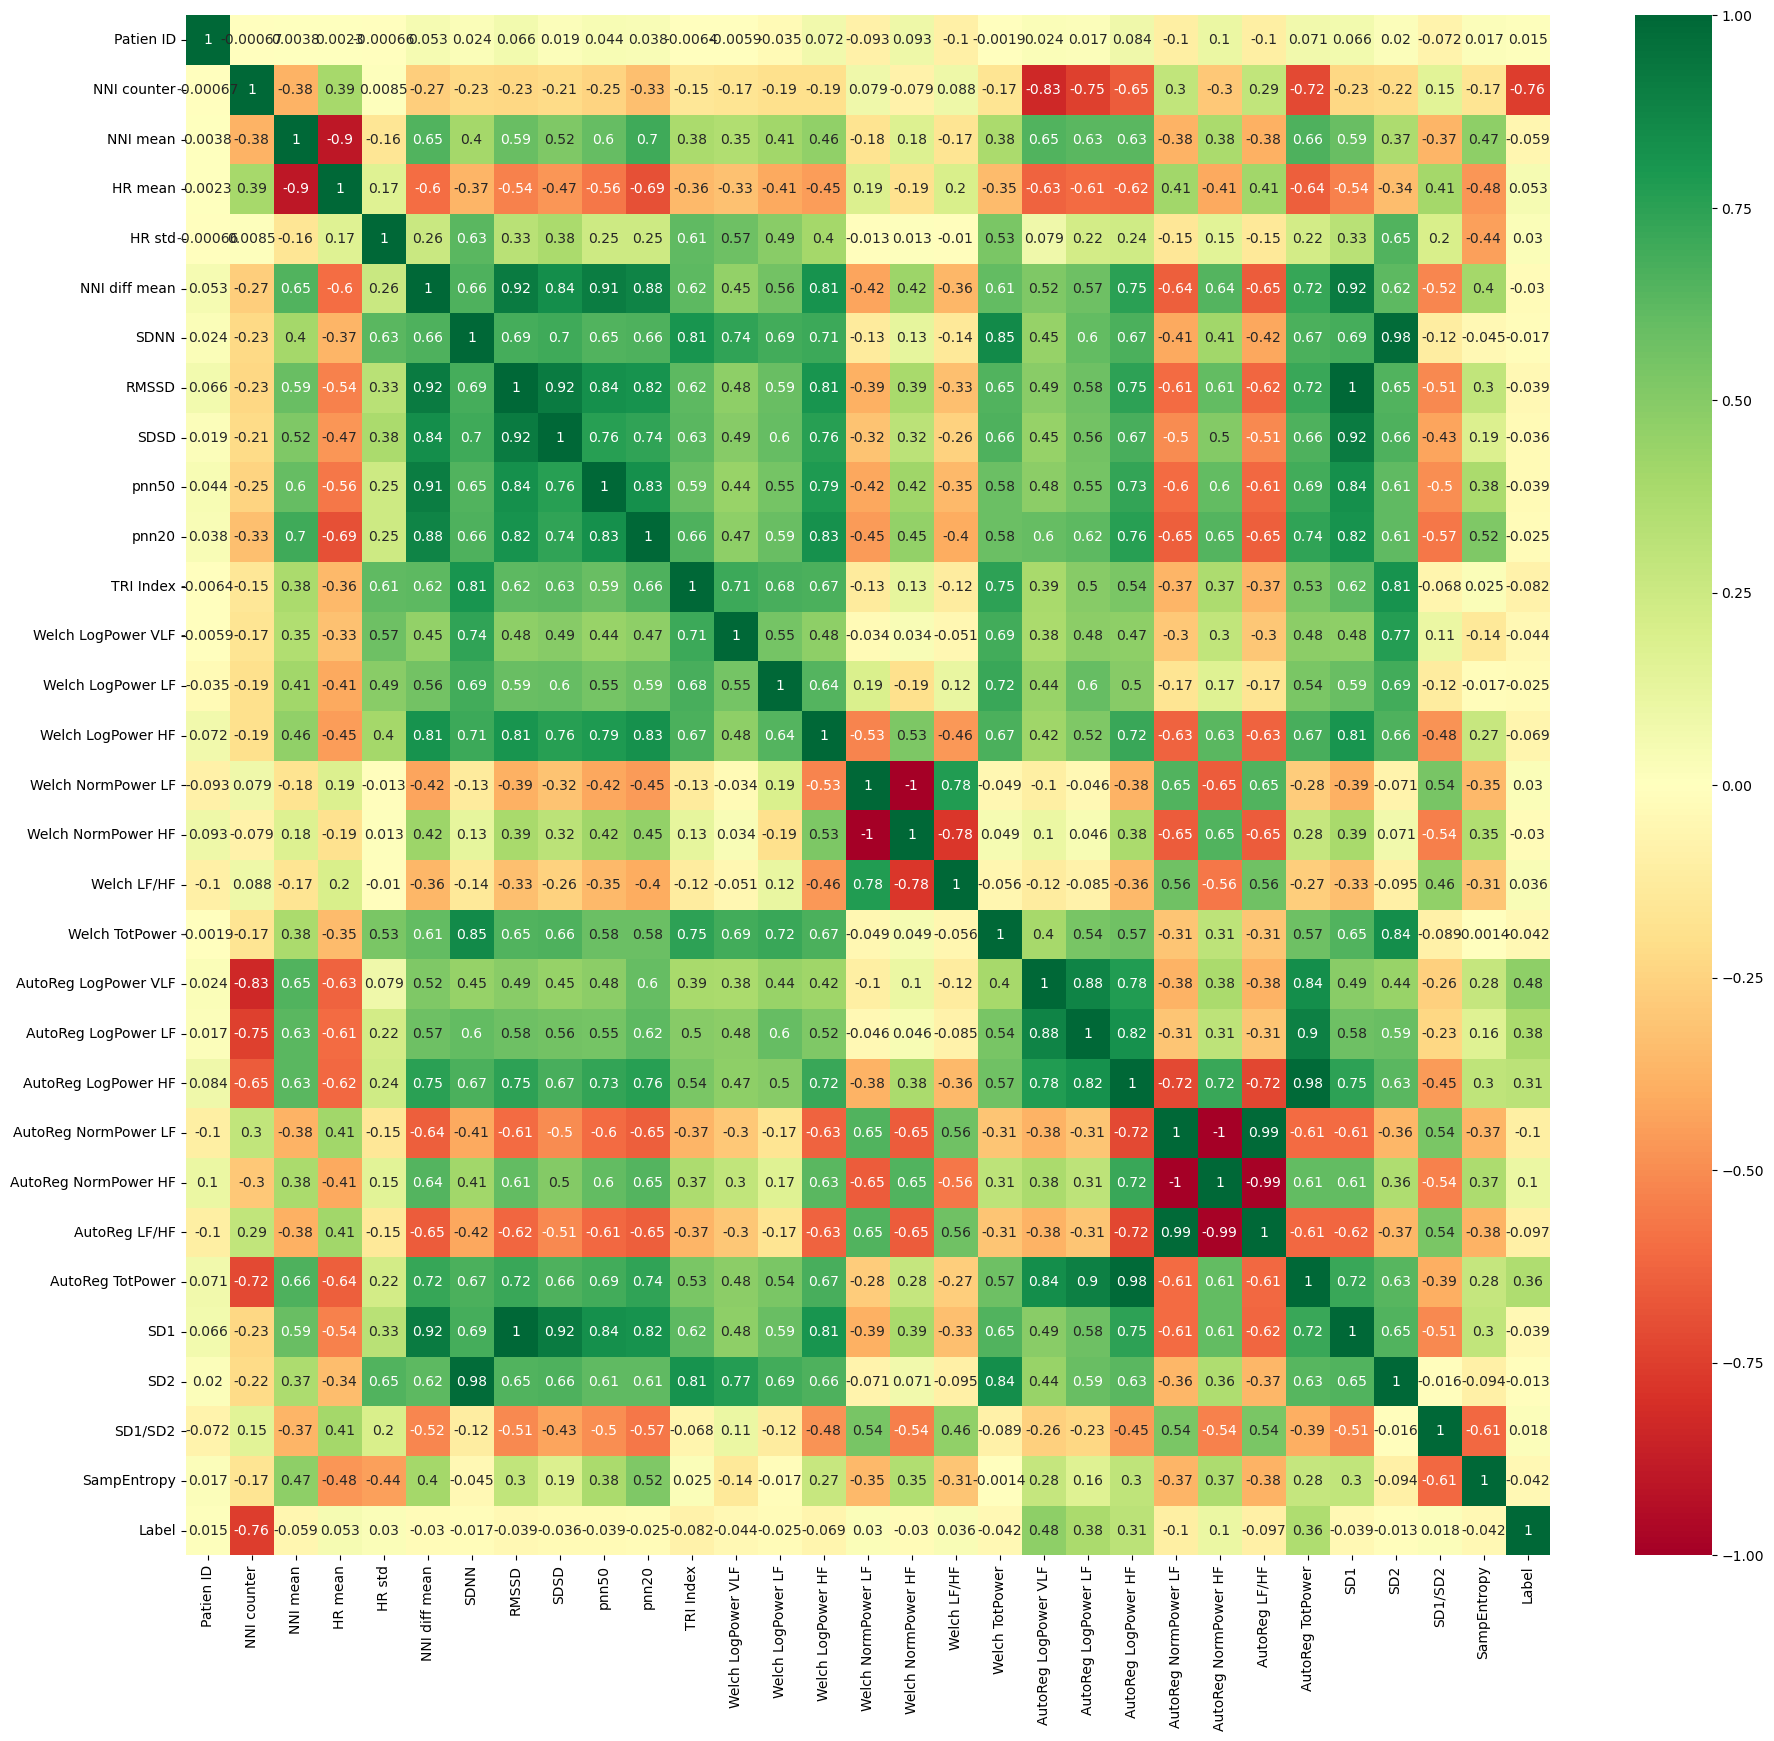

In [538]:
# To visualize the results we can use the heatmap (seaborn module)
import matplotlib.pyplot as plt

plt.figure(figsize=(22,20))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [310]:
# VISUALIZING DOMAIN ['TIME', 'FREQUENCY', 'NON LINEAR'] 

In [668]:
# LOW POSTIVE EMOTION
L=pd.DataFrame(df[df['Label']==308])
L

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
2,1.0,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774,308.0
11,4.0,206.0,865.558252,69.699199,5.265377,34.141463,63.302557,43.112162,26.389698,22.926829,...,9.208802,34.883054,65.116946,0.535699,17883.643876,30.483805,83.829865,2.749980,1.400088,308.0
26,9.0,244.0,731.049180,82.231530,3.553502,17.090535,32.634364,22.257842,14.288643,3.292181,...,9.142005,35.504891,64.495109,0.550505,16954.872039,15.738668,43.328262,2.752981,1.553938,308.0
29,10.0,197.0,905.791878,66.465394,3.904720,44.892857,52.682165,51.883455,26.076687,38.775510,...,9.217563,34.172345,65.827655,0.519118,17852.409641,36.684098,64.498141,1.758204,1.448598,308.0
35,12.0,189.0,943.010582,63.942715,4.519494,34.180851,66.800273,45.384879,29.936997,19.148936,...,9.208045,34.886678,65.113322,0.535784,17872.023595,32.091952,88.655830,2.762556,1.364839,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,179.0,201.0,890.472637,67.595670,3.976633,28.140000,48.815372,34.254635,19.581562,15.000000,...,9.192438,35.014499,64.985501,0.538805,17654.867380,24.216911,64.165791,2.649627,1.650065,308.0
539,180.0,240.0,743.300000,80.929787,4.115169,21.786611,37.992644,27.919715,17.496712,7.112971,...,9.168026,34.696505,65.303495,0.531312,17162.611935,19.741771,49.909407,2.528112,1.562693,308.0
548,183.0,217.0,822.142857,73.487764,6.255206,29.953704,67.396923,38.129045,23.647168,16.666667,...,9.184541,35.080545,64.919455,0.540370,17549.681864,26.960683,91.353911,3.388412,1.399874,308.0
551,184.0,191.0,932.743455,64.460106,3.013400,25.752632,41.733517,31.796143,18.698580,7.894737,...,9.183853,35.514302,64.485698,0.550731,17647.962602,22.483231,54.475198,2.422926,1.501428,308.0


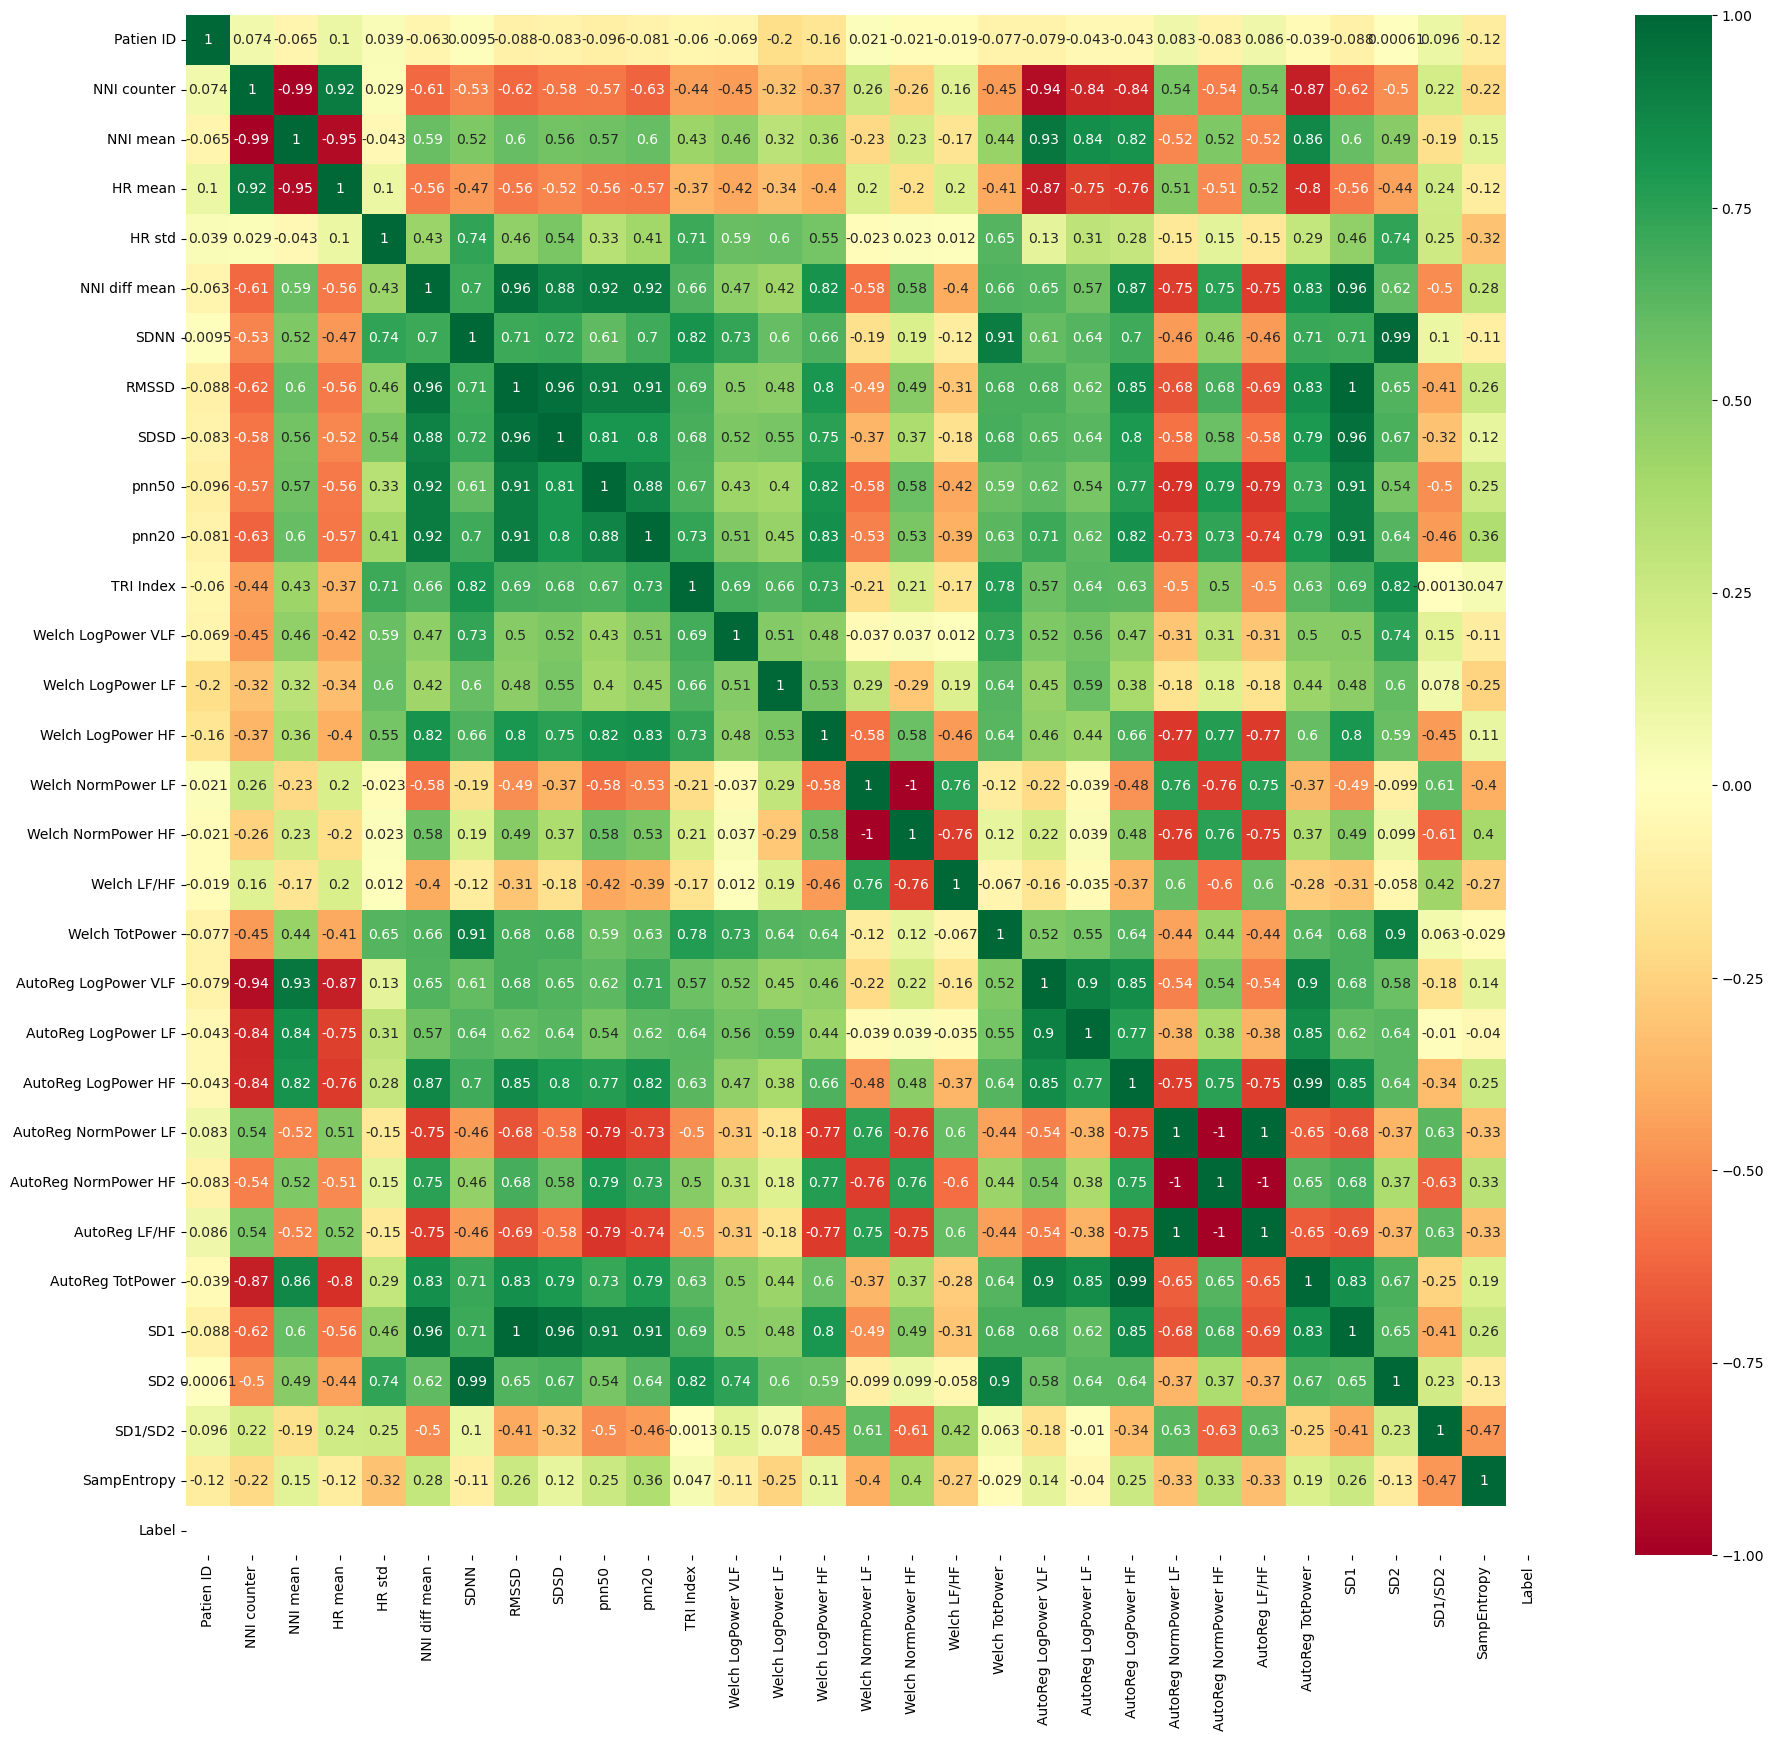

In [589]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,20))
g=sns.heatmap(L.corr(),annot=True,cmap="RdYlGn")

In [568]:
# TIME DOMIAN
Ltime=L.iloc[:,1:12]
Ltime

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,TRI Index
2,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,28.937729,7.025641
11,206.0,865.558252,69.699199,5.265377,34.141463,63.302557,43.112162,26.389698,22.926829,63.902439,14.714286
26,244.0,731.049180,82.231530,3.553502,17.090535,32.634364,22.257842,14.288643,3.292181,31.275720,8.413793
29,197.0,905.791878,66.465394,3.904720,44.892857,52.682165,51.883455,26.076687,38.775510,83.163265,11.588235
35,189.0,943.010582,63.942715,4.519494,34.180851,66.800273,45.384879,29.936997,19.148936,59.574468,12.600000
...,...,...,...,...,...,...,...,...,...,...,...
536,201.0,890.472637,67.595670,3.976633,28.140000,48.815372,34.254635,19.581562,15.000000,61.500000,10.578947
539,240.0,743.300000,80.929787,4.115169,21.786611,37.992644,27.919715,17.496712,7.112971,45.606695,7.272727
548,217.0,822.142857,73.487764,6.255206,29.953704,67.396923,38.129045,23.647168,16.666667,58.796296,18.083333
551,191.0,932.743455,64.460106,3.013400,25.752632,41.733517,31.796143,18.698580,7.894737,56.842105,9.550000


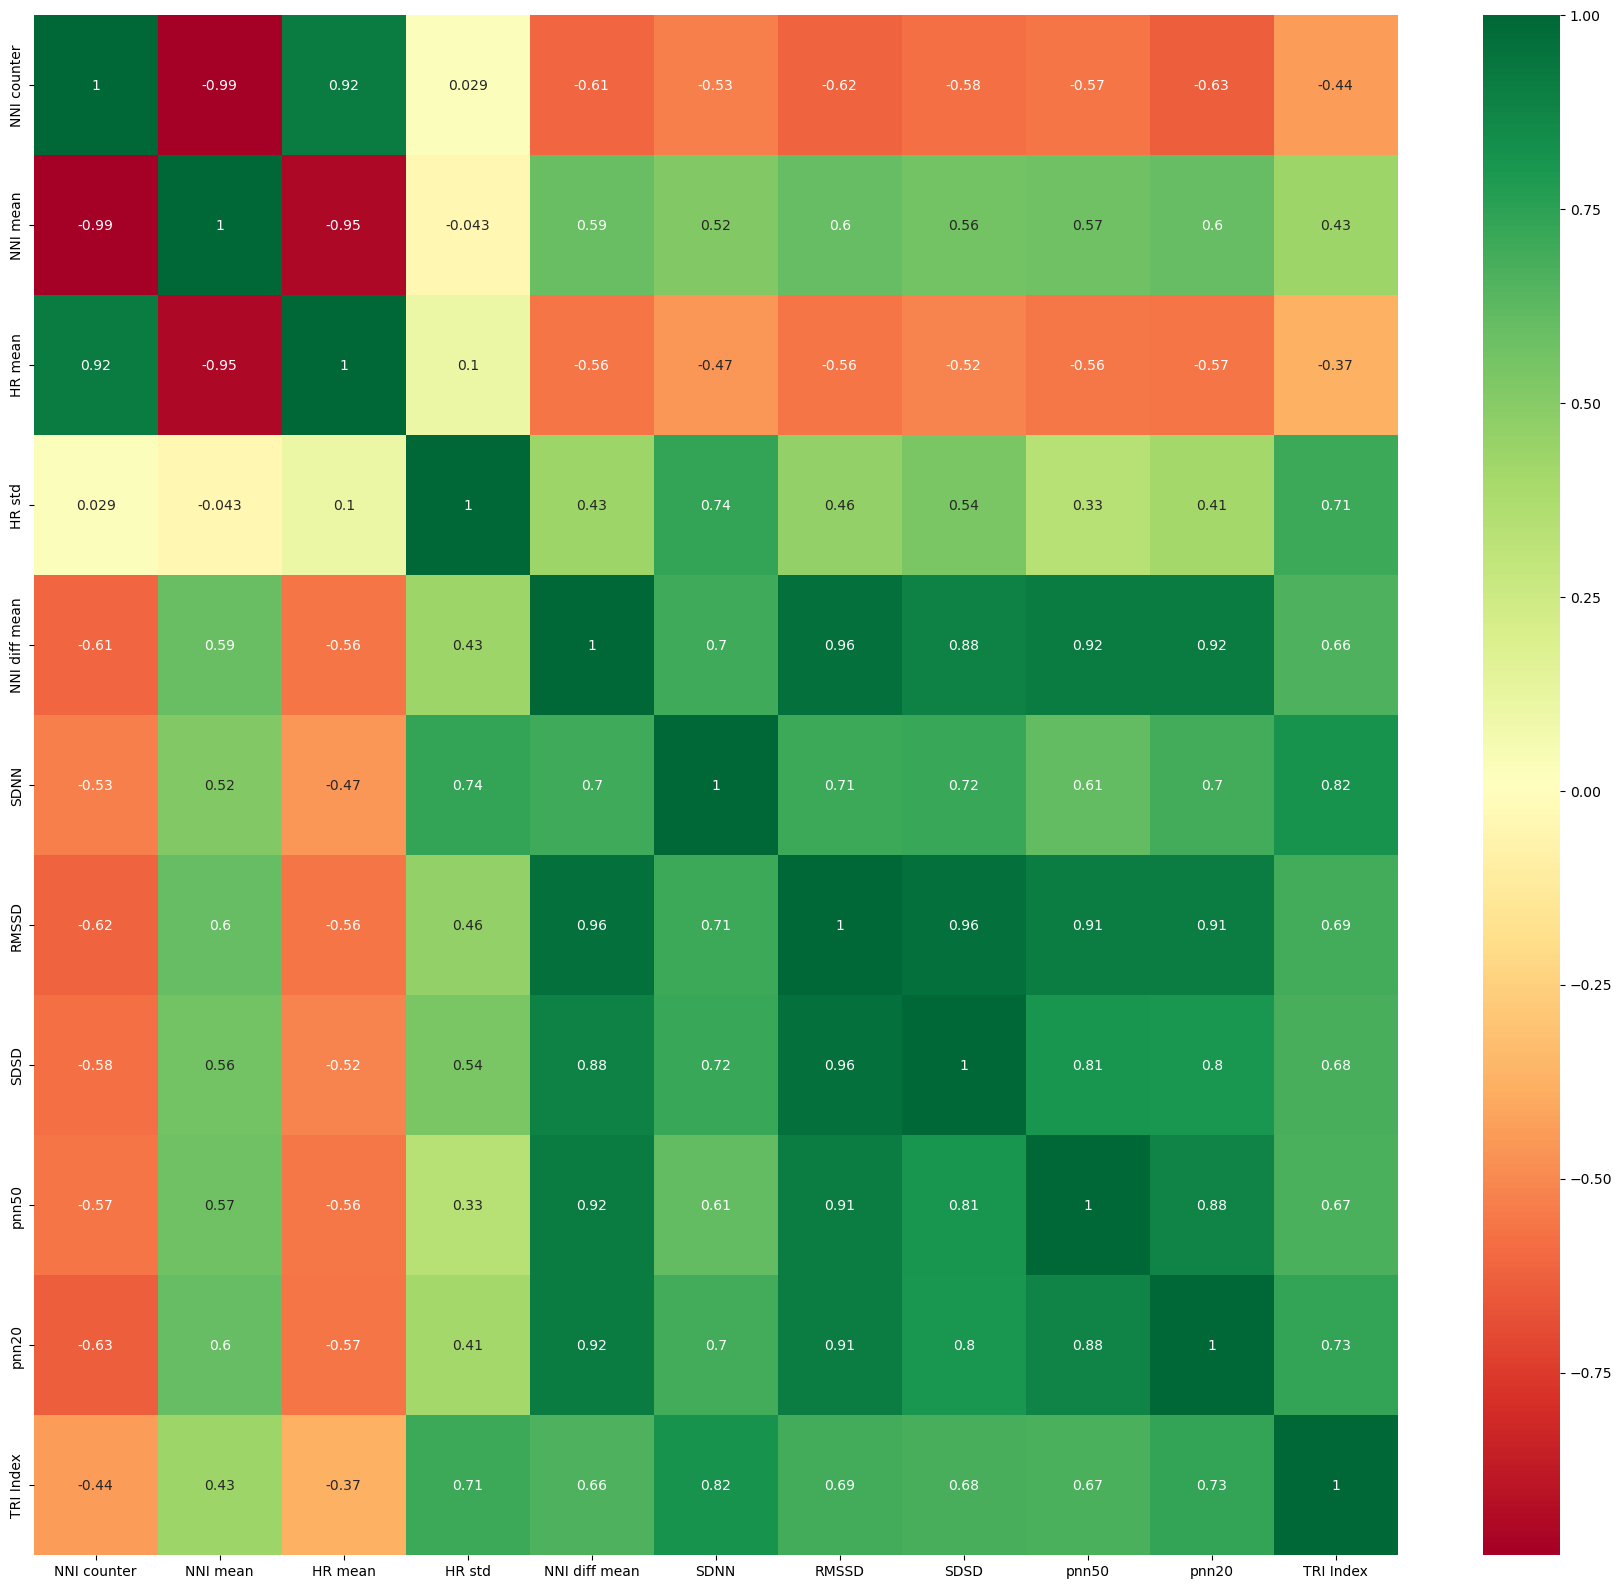

In [569]:
# To visualize the results we can use the heatmap (seaborn module)
import matplotlib.pyplot as plt

plt.figure(figsize=(22,20))
g=sns.heatmap(Ltime.corr(),annot=True,cmap="RdYlGn")

In [565]:
#frequency
Lfrequency=L.iloc[:,12:26]
Lfrequency

,Welch LogPower VLF,Welch LogPower LF,Welch LogPower HF,Welch NormPower LF,Welch NormPower HF,Welch LF/HF,Welch TotPower,AutoReg LogPower VLF,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower
2,5.086065,5.151501,5.402975,43.746070,56.253930,0.777654,556.508532,7.799405,8.515669,9.099743,35.799574,64.200426,0.557622,16384.528244
11,4.906276,7.449614,6.865253,64.207018,35.792982,1.793844,2812.723695,7.843952,8.584618,9.208802,34.883054,65.116946,0.535699,17883.643876
26,6.059830,6.193538,5.648680,63.294161,36.705839,1.724362,1201.794293,7.813580,8.545086,9.142005,35.504891,64.495109,0.550505,16954.872039
29,6.013475,6.708784,6.961580,43.713527,56.286473,0.776626,2283.774719,7.844286,8.561939,9.217563,34.172345,65.827655,0.519118,17852.409641
35,7.525326,7.978727,6.456450,82.087352,17.912648,4.582647,5409.426561,7.843611,8.584021,9.208045,34.886678,65.113322,0.535784,17872.023595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,7.480781,6.646091,5.933975,67.086859,32.913141,2.038300,2921.048398,7.839860,8.574036,9.192438,35.014499,64.985501,0.538805,17654.867380
539,5.404187,6.035346,5.584920,61.074065,38.925935,1.568981,906.657821,7.817603,8.535619,9.168026,34.696505,65.303495,0.531312,17162.611935
548,7.762053,7.554252,6.534724,73.488064,26.511936,2.771886,4947.210021,7.839249,8.569041,9.184541,35.080545,64.919455,0.540370,17549.681864
551,6.028666,5.594719,5.200209,59.736797,40.263203,1.483657,865.473026,7.842278,8.587345,9.183853,35.514302,64.485698,0.550731,17647.962602


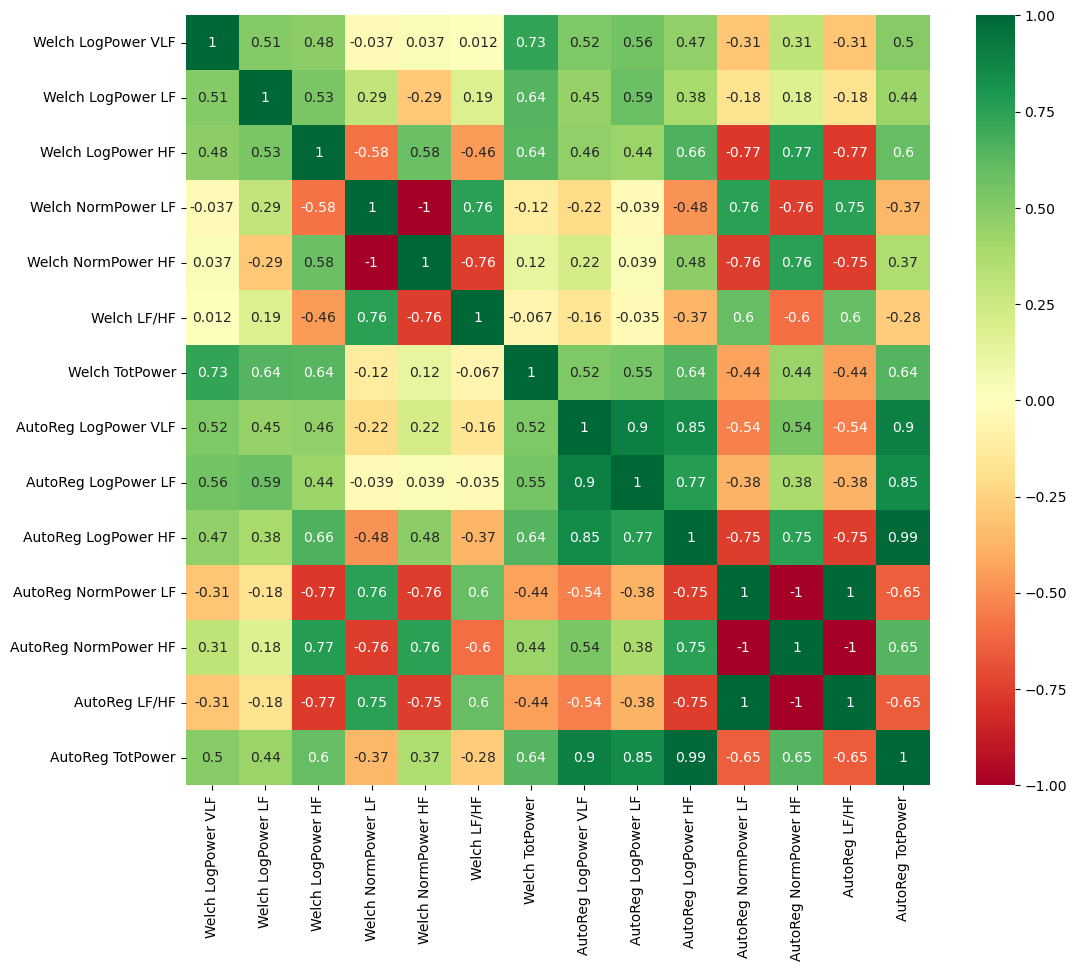

In [587]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Lfrequency.corr(),annot=True,cmap="RdYlGn")

In [571]:
# Non-linear
Lnonlinear=L.iloc[:,26:30]
Lnonlinear

,SD1,SD2,SD1/SD2,SampEntropy
2,14.639016,43.653040,2.981966,1.549774
11,30.483805,83.829865,2.749980,1.400088
26,15.738668,43.328262,2.752981,1.553938
29,36.684098,64.498141,1.758204,1.448598
35,32.091952,88.655830,2.762556,1.364839
...,...,...,...,...
536,24.216911,64.165791,2.649627,1.650065
539,19.741771,49.909407,2.528112,1.562693
548,26.960683,91.353911,3.388412,1.399874
551,22.483231,54.475198,2.422926,1.501428


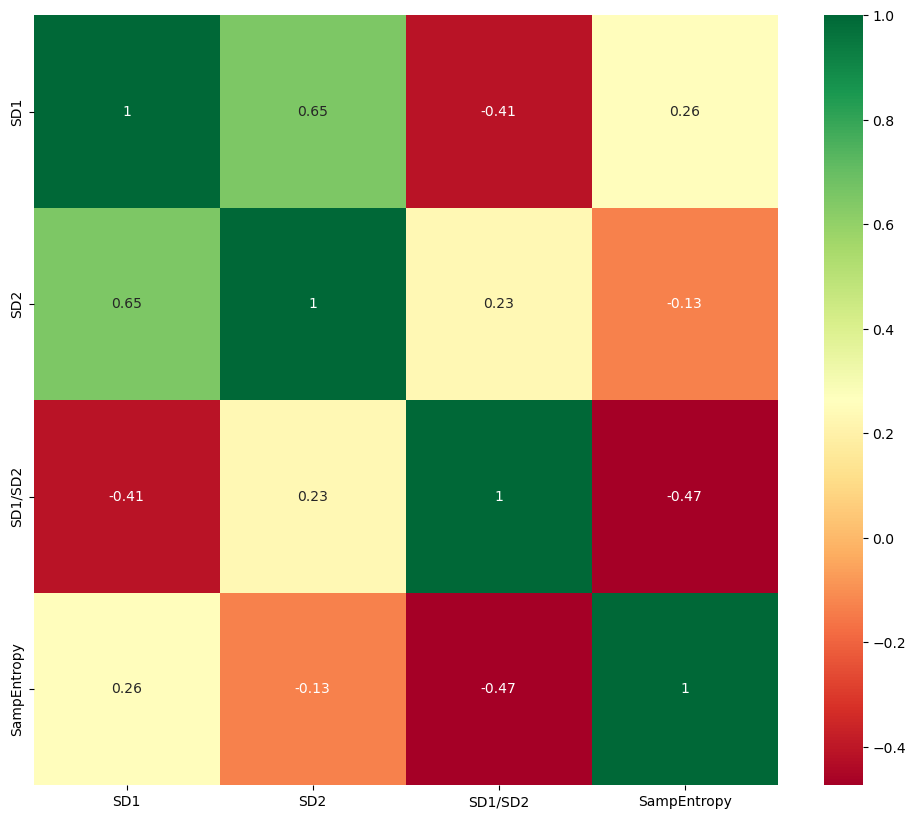

In [572]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Lnonlinear.corr(),annot=True,cmap="RdYlGn")

In [545]:
# HIGH POSTIVE EMOTION
H=df[df['Label']==309]
H

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
14,5.0,286.0,625.611888,96.009236,3.128001,7.540351,20.720523,9.853844,6.354766,0.000000,...,9.074489,35.883906,64.116094,0.559671,16026.338190,6.967684,28.355258,4.069538,1.113851,309.0
23,8.0,254.0,700.401575,85.850837,4.007949,11.201581,32.646692,14.296134,8.900401,0.000000,...,9.109994,35.737543,64.262457,0.556119,16522.707338,10.108838,45.045453,4.456047,1.179976,309.0
32,11.0,224.0,798.566964,75.377255,4.295706,21.219731,45.461016,26.273313,15.527110,4.035874,...,9.130536,35.560137,64.439863,0.551834,16814.174821,18.577465,61.134102,3.290767,1.552087,309.0
50,17.0,148.0,758.612686,50.842676,7.595670,23.014952,52.880231,30.888640,19.698328,8.974359,...,9.147733,33.719711,66.280289,0.508744,16987.990336,21.841106,70.490117,1.432337,1.453736,309.0
59,20.0,190.0,935.994737,64.830087,7.185914,54.994709,95.973734,69.786977,43.076935,45.502646,...,9.229074,34.183251,65.816749,0.519370,18023.882666,49.346545,125.577578,2.544810,1.563145,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,170.0,157.0,758.612686,53.354395,3.901464,23.014952,69.595768,30.888640,19.698328,8.974359,...,9.261140,34.354426,65.645574,0.523332,18645.507373,21.841106,78.431440,1.325284,1.854560,309.0
518,173.0,273.0,655.413919,92.280510,8.226540,22.169118,59.085003,29.563615,19.594621,7.352941,...,9.100027,36.797247,63.202753,0.582210,16651.688478,20.904423,80.826379,3.866473,1.160664,309.0
530,177.0,213.0,838.737089,72.116552,6.580292,43.877358,74.714907,58.754687,39.167934,28.301887,...,9.211082,34.487858,65.512142,0.526435,17810.778312,41.545717,97.141393,2.338181,1.483024,309.0
533,178.0,261.0,684.126437,87.869295,3.778533,11.242308,30.260715,14.897470,9.793571,1.153846,...,9.105143,36.021762,63.978238,0.563031,16523.071315,10.534043,41.457790,3.935601,1.243090,309.0


In [573]:
# TIME DOMAIN
Htime=H.iloc[:,1:12]
Htime

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,TRI Index
14,286.0,625.611888,96.009236,3.128001,7.540351,20.720523,9.853844,6.354766,0.000000,5.614035,5.720000
23,254.0,700.401575,85.850837,4.007949,11.201581,32.646692,14.296134,8.900401,0.000000,13.833992,7.696970
32,224.0,798.566964,75.377255,4.295706,21.219731,45.461016,26.273313,15.527110,4.035874,46.636771,10.666667
50,148.0,758.612686,50.842676,7.595670,23.014952,52.880231,30.888640,19.698328,8.974359,88.435374,11.961538
59,190.0,935.994737,64.830087,7.185914,54.994709,95.973734,69.786977,43.076935,45.502646,76.190476,17.272727
...,...,...,...,...,...,...,...,...,...,...,...
509,157.0,758.612686,53.354395,3.901464,23.014952,69.595768,30.888640,19.698328,8.974359,79.487179,11.214286
518,273.0,655.413919,92.280510,8.226540,22.169118,59.085003,29.563615,19.594621,7.352941,40.808824,13.000000
530,213.0,838.737089,72.116552,6.580292,43.877358,74.714907,58.754687,39.167934,28.301887,68.396226,17.750000
533,261.0,684.126437,87.869295,3.778533,11.242308,30.260715,14.897470,9.793571,1.153846,13.076923,7.676471


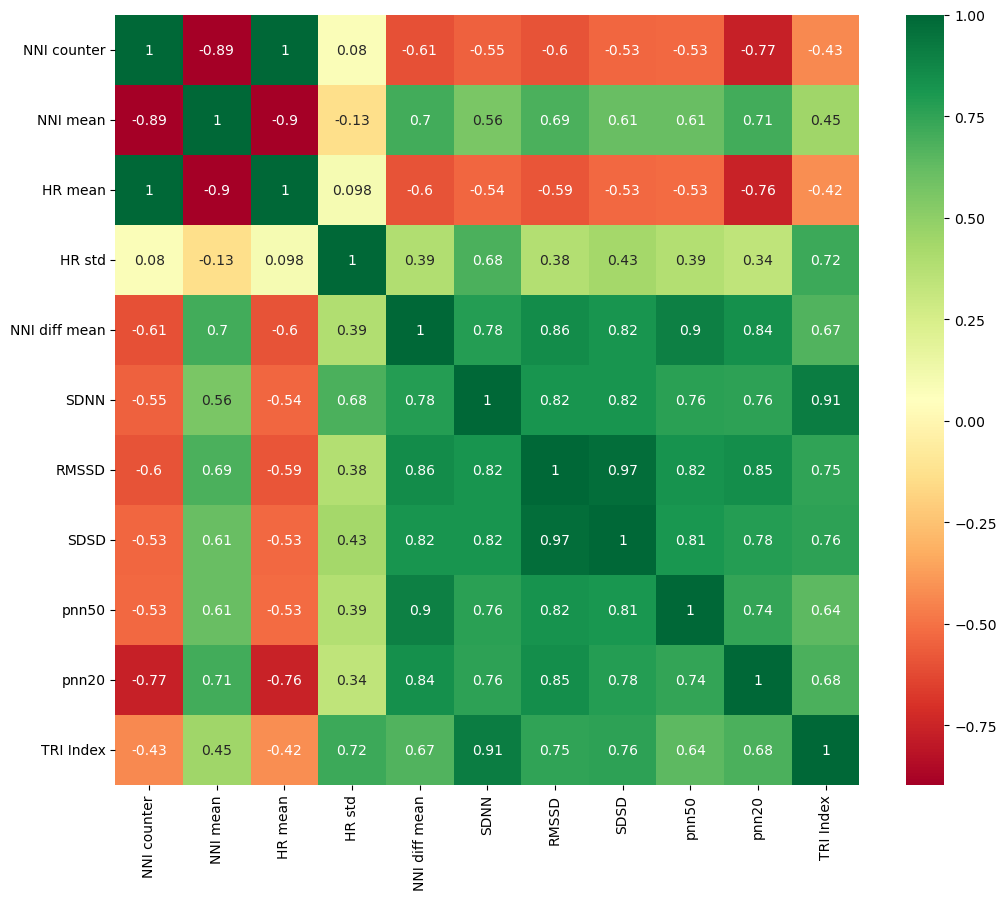

In [574]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Htime.corr(),annot=True,cmap="RdYlGn")

In [575]:
# FREQUENCY
Hfrequency=H.iloc[:,12:26]
Hfrequency

,Welch LogPower VLF,Welch LogPower LF,Welch LogPower HF,Welch NormPower LF,Welch NormPower HF,Welch LF/HF,Welch TotPower,AutoReg LogPower VLF,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower
14,4.059841,5.471302,3.762674,84.665821,15.334179,5.521380,338.798117,7.787729,8.494083,9.074489,35.883906,64.116094,0.559671,16026.338190
23,6.477022,6.451085,4.169425,90.734676,9.265324,2.152316,1348.099893,7.802714,8.523221,9.109994,35.737543,64.262457,0.556119,16522.707338
32,5.979851,7.314492,5.629196,84.360454,15.639546,5.394048,2175.727745,7.818484,8.536029,9.130536,35.560137,64.439863,0.551834,16814.174821
50,7.207168,8.679433,5.933975,26.840554,73.159446,0.366877,2323.766223,7.809624,8.539063,9.147733,33.719711,66.280289,0.508744,16987.990336
59,7.450544,7.743502,7.281005,61.360645,38.639355,1.588035,5479.781765,7.841045,8.573936,9.229074,34.183251,65.816749,0.519370,18023.882666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,6.917455,7.754179,7.788247,49.148384,50.851616,0.966506,5753.125611,7.870300,8.613600,9.261140,34.354426,65.645574,0.523332,18645.507373
518,6.254180,7.874091,6.091689,85.599328,14.400672,5.944120,3590.646240,7.816885,8.559102,9.100027,36.797247,63.202753,0.582210,16651.688478
530,7.376186,7.863612,6.913996,72.103786,27.896214,2.584716,5204.642324,7.837992,8.569454,9.211082,34.487858,65.512142,0.526435,17810.778312
533,5.916568,5.451741,3.596405,86.475241,13.524759,6.393847,640.766617,7.805265,8.530724,9.105143,36.021762,63.978238,0.563031,16523.071315


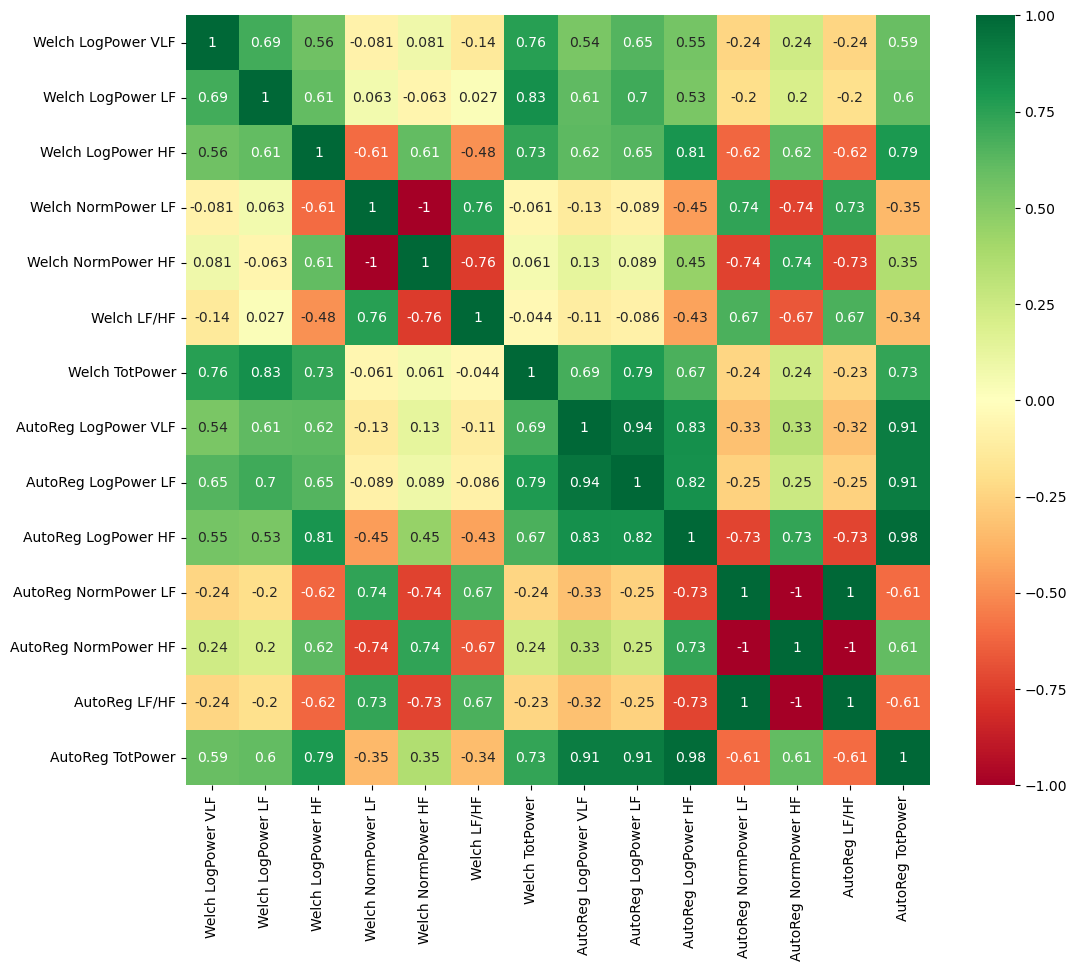

In [576]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Hfrequency.corr(),annot=True,cmap="RdYlGn")

In [577]:
# NON_LINEAR
Hnonlinear=H.iloc[:,26:30]
Hnonlinear

,SD1,SD2,SD1/SD2,SampEntropy
14,6.967684,28.355258,4.069538,1.113851
23,10.108838,45.045453,4.456047,1.179976
32,18.577465,61.134102,3.290767,1.552087
50,21.841106,70.490117,1.432337,1.453736
59,49.346545,125.577578,2.544810,1.563145
...,...,...,...,...
509,21.841106,78.431440,1.325284,1.854560
518,20.904423,80.826379,3.866473,1.160664
530,41.545717,97.141393,2.338181,1.483024
533,10.534043,41.457790,3.935601,1.243090


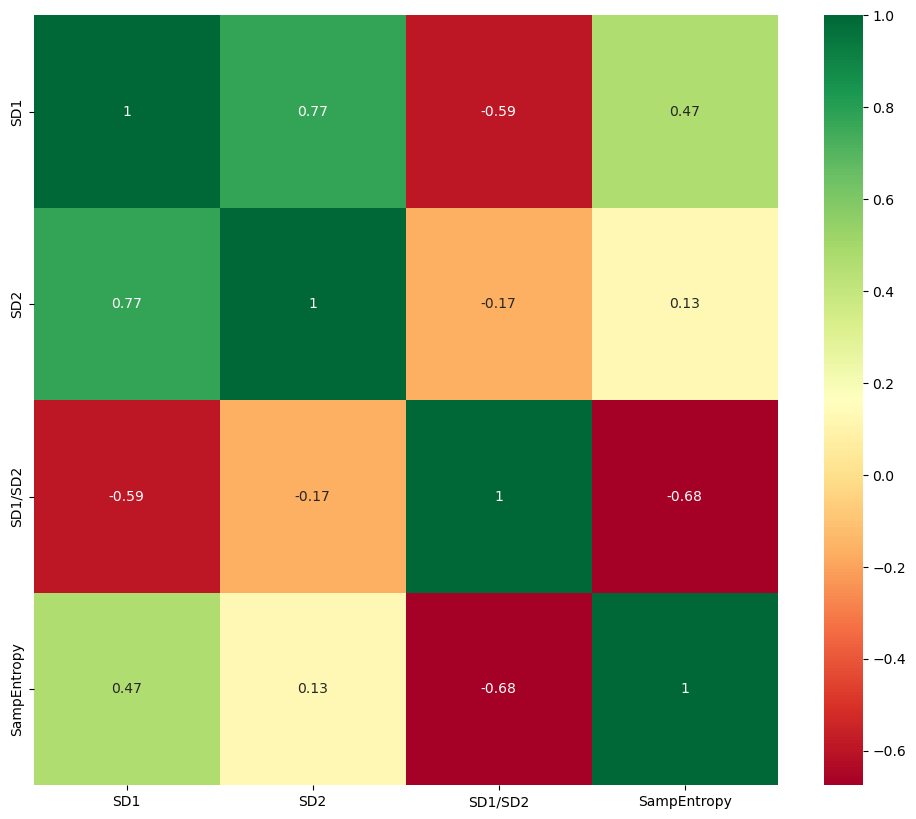

In [578]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Hnonlinear.corr(),annot=True,cmap="RdYlGn")

In [549]:
# NUTROL EMOTION

N=df[df['Label']==108]


,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
5,2.0,259.0,688.104247,87.420981,4.390448,17.329457,35.476719,21.703517,13.091863,1.937984,...,9.106751,35.660537,64.339463,0.554256,16464.842055,15.346615,47.650262,3.104936,1.584965,108.0
8,3.0,194.0,922.541237,65.333858,4.453019,32.341969,61.869165,40.365172,24.215335,21.761658,...,9.196857,35.143881,64.856119,0.541875,17745.074062,28.542276,82.648220,2.895642,1.912387,108.0
17,6.0,234.0,763.341880,78.779441,3.708727,21.175966,36.825225,26.254940,15.554380,3.862661,...,9.137266,35.428272,64.571728,0.548665,16872.469027,18.564879,48.525225,2.613819,1.678964,108.0
20,7.0,231.0,772.264069,77.845396,3.431201,19.500000,34.411505,24.134857,14.252174,2.173913,...,9.129831,35.624280,64.375720,0.553381,16829.461757,17.062983,45.118774,2.644249,1.662548,108.0
38,13.0,248.0,720.697581,83.463891,4.215374,20.870445,36.374921,25.925227,15.411148,6.477733,...,9.135383,35.195390,64.804610,0.543100,16761.852031,18.331741,47.938325,2.615045,1.686399,108.0
41,14.0,274.0,652.846715,92.038598,3.452284,12.611722,25.367451,16.967864,11.372187,1.098901,...,9.108393,35.840722,64.159278,0.558621,16502.165266,11.997667,33.747659,2.812852,1.362552,108.0
53,18.0,206.0,865.907767,69.469121,3.562136,28.156098,43.521637,34.638763,20.225567,16.585366,...,9.188411,34.963574,65.036426,0.537600,17572.761016,24.493295,56.464541,2.305306,1.760011,108.0
56,19.0,208.0,856.605769,70.216832,3.504828,22.222222,42.557587,27.798968,16.742449,7.729469,...,9.152085,35.567359,64.432641,0.552008,17164.124339,19.656834,56.736766,2.886363,1.609438,108.0
65,22.0,261.0,684.356322,87.732074,2.284354,9.238462,17.606365,11.629869,7.077949,0.000000,...,9.111239,35.551818,64.448182,0.551634,16499.074641,8.223530,23.497472,2.857346,1.478353,108.0
74,25.0,246.0,725.483740,82.835315,3.334073,16.273469,28.871951,20.818849,13.011136,2.857143,...,9.113619,35.626869,64.373131,0.553443,16555.726045,14.720525,37.893630,2.574204,1.458120,108.0


In [579]:
# TIME DOMAIN
Ntime=N.iloc[:,1:12]
Ntime

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,TRI Index
5,259.0,688.104247,87.420981,4.390448,17.329457,35.476719,21.703517,13.091863,1.937984,36.046512,8.093750
8,194.0,922.541237,65.333858,4.453019,32.341969,61.869165,40.365172,24.215335,21.761658,62.694301,13.857143
17,234.0,763.341880,78.779441,3.708727,21.175966,36.825225,26.254940,15.554380,3.862661,47.639485,9.000000
20,231.0,772.264069,77.845396,3.431201,19.500000,34.411505,24.134857,14.252174,2.173913,44.347826,7.965517
38,248.0,720.697581,83.463891,4.215374,20.870445,36.374921,25.925227,15.411148,6.477733,44.129555,8.857143
41,274.0,652.846715,92.038598,3.452284,12.611722,25.367451,16.967864,11.372187,1.098901,18.315018,6.227273
53,206.0,865.907767,69.469121,3.562136,28.156098,43.521637,34.638763,20.225567,16.585366,54.634146,9.363636
56,208.0,856.605769,70.216832,3.504828,22.222222,42.557587,27.798968,16.742449,7.729469,43.478261,9.904762
65,261.0,684.356322,87.732074,2.284354,9.238462,17.606365,11.629869,7.077949,0.000000,7.692308,4.350000
74,246.0,725.483740,82.835315,3.334073,16.273469,28.871951,20.818849,13.011136,2.857143,28.979592,7.235294


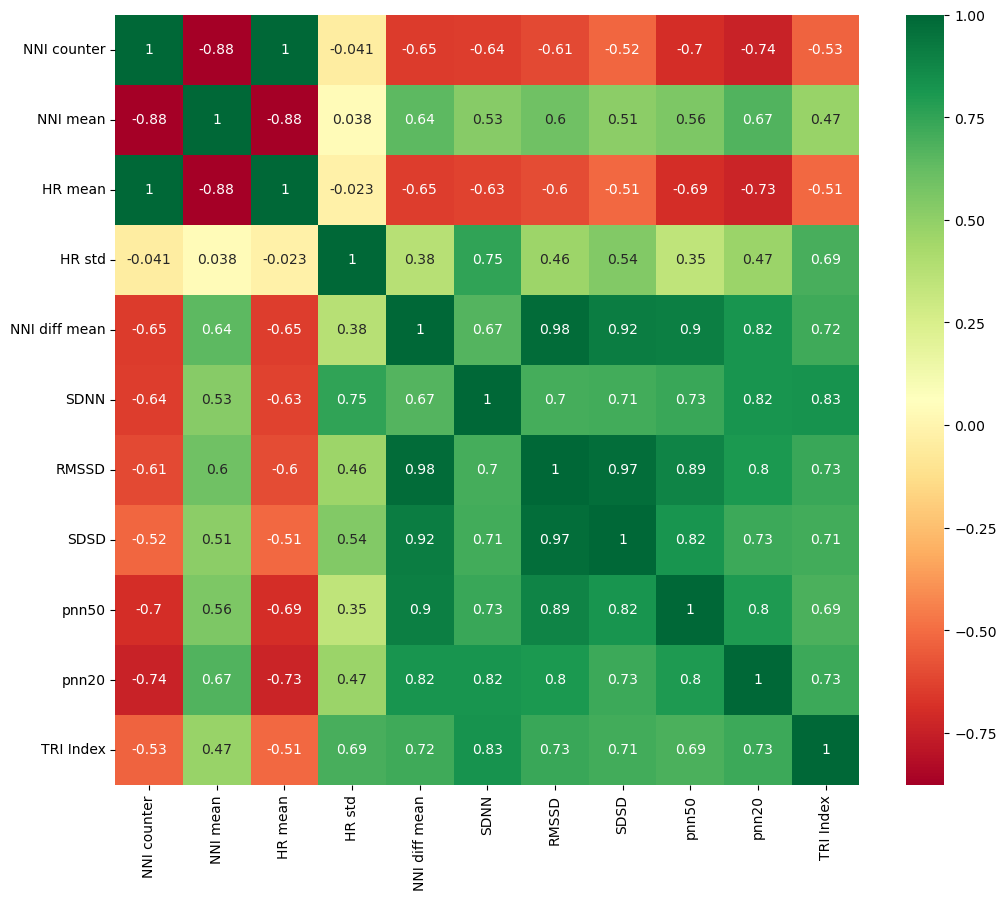

In [580]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Ntime.corr(),annot=True,cmap="RdYlGn")

In [581]:
# FREQUENCY DOMAIN
Nfrequency=N.iloc[:,12:26]
Nfrequency

,Welch LogPower VLF,Welch LogPower LF,Welch LogPower HF,Welch NormPower LF,Welch NormPower HF,Welch LF/HF,Welch TotPower,AutoReg LogPower VLF,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower
5,5.369432,6.836991,4.763691,88.828090,11.171910,7.951021,1263.600334,7.804552,8.516623,9.106751,35.660537,64.339463,0.554256,16464.842055
8,7.920753,7.200073,6.451451,67.887838,32.112162,2.114085,4726.994692,7.837095,8.584136,9.196857,35.143881,64.856119,0.541875,17745.074062
17,7.001451,6.367873,5.669151,66.790443,33.209557,2.011181,1970.830527,7.814858,8.536999,9.137266,35.428272,64.571728,0.548665,16872.469027
20,5.633060,5.850851,5.174081,66.301762,33.698238,1.967514,803.680279,7.822946,8.538122,9.129831,35.624280,64.375720,0.553381,16829.461757
38,6.307575,6.383217,5.393702,72.899220,27.100780,2.689931,1360.557402,7.801896,8.524921,9.135383,35.195390,64.804610,0.543100,16761.852031
41,4.056592,5.731321,4.569865,76.159717,23.840283,3.194581,462.684586,7.794255,8.526109,9.108393,35.840722,64.159278,0.558621,16502.165266
53,6.366699,6.380852,5.841525,63.165576,36.834424,1.714852,1516.867875,7.836084,8.567770,9.188411,34.963574,65.036426,0.537600,17572.761016
56,7.042422,6.488327,5.357619,75.596944,24.403056,3.097847,2013.796653,7.832939,8.557893,9.152085,35.567359,64.432641,0.552008,17164.124339
65,6.767175,6.805992,3.628733,64.984143,35.015857,1.855849,136.165027,7.802489,8.516369,9.111239,35.551818,64.448182,0.551634,16499.074641
74,5.639970,6.178894,5.303594,70.584719,29.415281,2.399594,964.970274,7.805242,8.522023,9.113619,35.626869,64.373131,0.553443,16555.726045


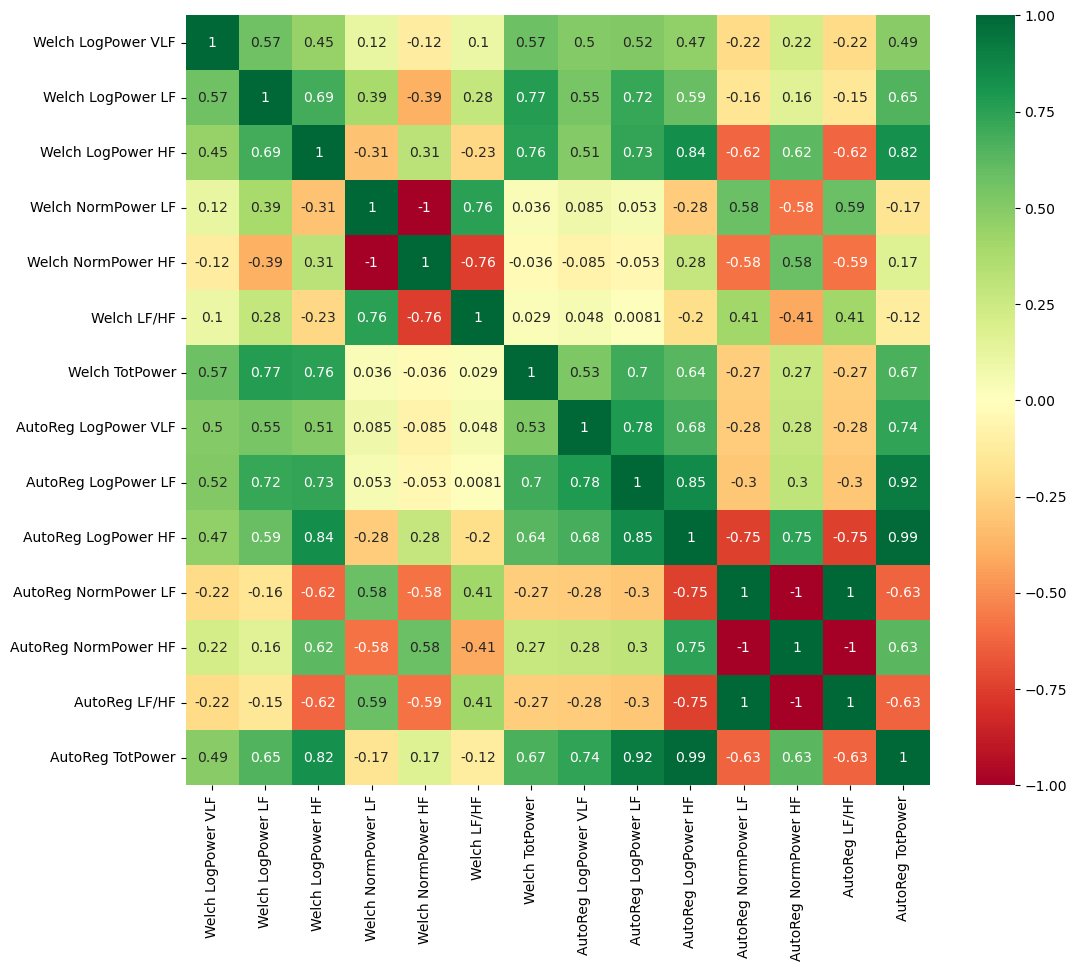

In [582]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Nfrequency.corr(),annot=True,cmap="RdYlGn")

In [584]:
# NON_LINEAR DOMAIN
Nnonlinear=N.iloc[:,26:30]
Nnonlinear

,SD1,SD2,SD1/SD2,SampEntropy
5,15.346615,47.650262,3.104936,1.584965
8,28.542276,82.648220,2.895642,1.912387
17,18.564879,48.525225,2.613819,1.678964
20,17.062983,45.118774,2.644249,1.662548
38,18.331741,47.938325,2.615045,1.686399
41,11.997667,33.747659,2.812852,1.362552
53,24.493295,56.464541,2.305306,1.760011
56,19.656834,56.736766,2.886363,1.609438
65,8.223530,23.497472,2.857346,1.478353
74,14.720525,37.893630,2.574204,1.458120


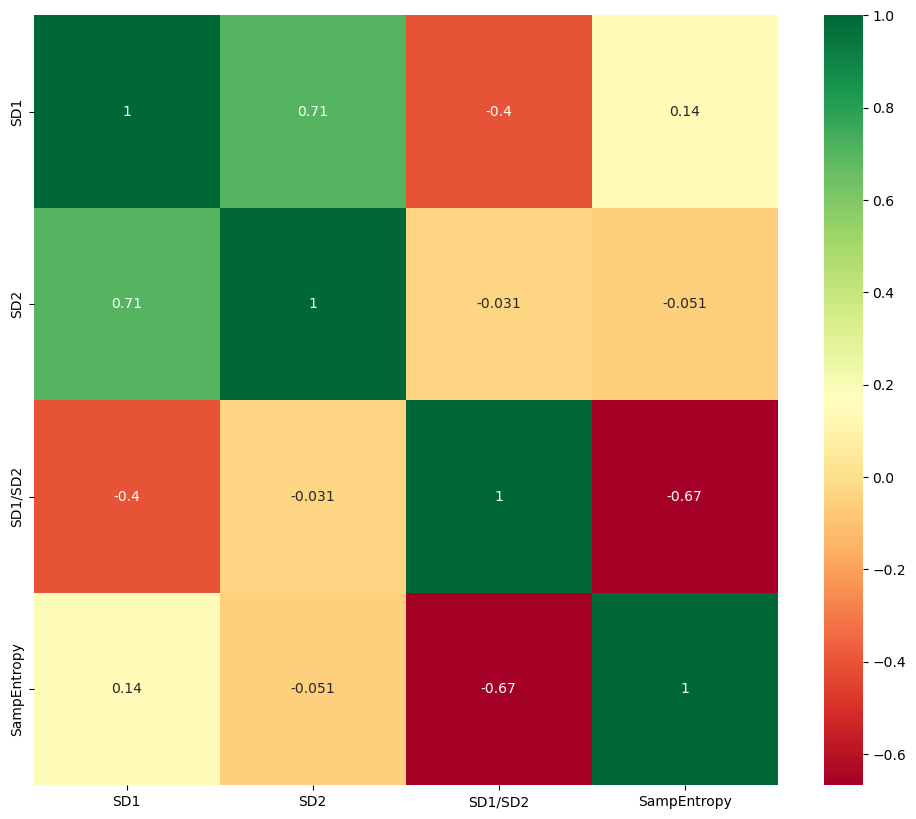

In [585]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Nnonlinear.corr(),annot=True,cmap="RdYlGn")

In [314]:
# fREQUENCY DOMIN

df1.iloc[:,11:25].columns


Index(['Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF',
       'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF',
       'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF',
       'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF',
       'AutoReg LF/HF', 'AutoReg TotPower'],
      dtype='object')

In [315]:
frequency=df1.iloc[:,11:25]
frequency

,Welch LogPower VLF,Welch LogPower LF,Welch LogPower HF,Welch NormPower LF,Welch NormPower HF,Welch LF/HF,Welch TotPower,AutoReg LogPower VLF,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower
0,0.480174,0.378135,0.499897,0.610961,0.389039,0.077792,0.033690,0.183405,0.163812,0.227322,0.718238,0.281762,0.703056,0.180405
1,0.419484,0.209712,0.529395,0.292439,0.707561,0.021718,0.022775,0.400804,0.342130,0.361554,0.688738,0.311262,0.672691,0.322240
2,0.267830,0.224408,0.490610,0.403255,0.596745,0.035026,0.012550,0.484021,0.374763,0.336721,0.768341,0.231659,0.754938,0.320378
3,0.357362,0.588899,0.510905,0.841766,0.158234,0.222240,0.047038,0.264160,0.257886,0.228028,0.823572,0.176428,0.812585,0.208131
4,0.440024,0.440792,0.440783,0.807502,0.192498,0.183888,0.030979,0.472019,0.388736,0.395920,0.682268,0.317732,0.666049,0.361043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.401846,0.196918,0.425186,0.520687,0.479313,0.055133,0.015720,0.292364,0.189380,0.353353,0.531446,0.468554,0.513024,0.273723
554,0.212647,0.229414,0.459592,0.486143,0.513857,0.048359,0.009716,0.324832,0.207913,0.322777,0.604265,0.395735,0.586478,0.260775
555,0.331637,0.283087,0.448974,0.591911,0.408089,0.072278,0.014911,0.308203,0.247426,0.270830,0.737828,0.262172,0.723295,0.235657
556,0.459713,0.170332,0.459483,0.397245,0.602755,0.034190,0.021637,0.578084,0.478630,0.494936,0.613768,0.386232,0.596122,0.456777


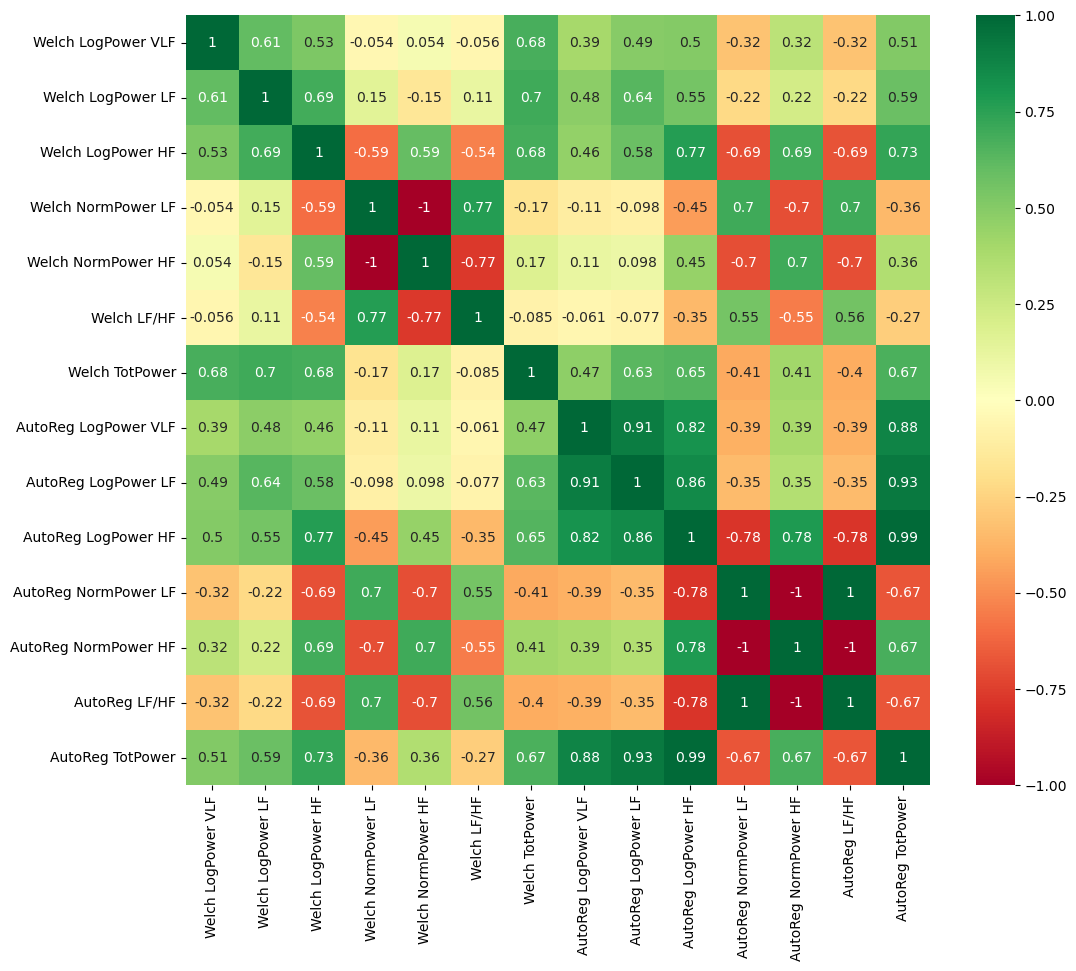

In [316]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(frequency.corr(),annot=True,cmap="RdYlGn")

In [317]:
# NON-LINEAR 

df1.iloc[:,25:29].columns

Index(['SD1', 'SD2', 'SD1/SD2', 'SampEntropy'], dtype='object')

In [318]:
nonlinear=df1.iloc[:,25:29]
nonlinear

,SD1,SD2,SD1/SD2,SampEntropy
0,0.082312,0.150477,0.410602,0.424963
1,0.081736,0.128370,0.363929,0.533861
2,0.087627,0.110171,0.297585,0.621900
3,0.088229,0.142613,0.363893,0.558089
4,0.079112,0.138584,0.400848,0.551527
...,...,...,...,...
553,0.103097,0.143108,0.303849,0.263217
554,0.072010,0.069797,0.271461,0.381550
555,0.075139,0.091203,0.309395,0.643612
556,0.079439,0.151542,0.428912,0.485021


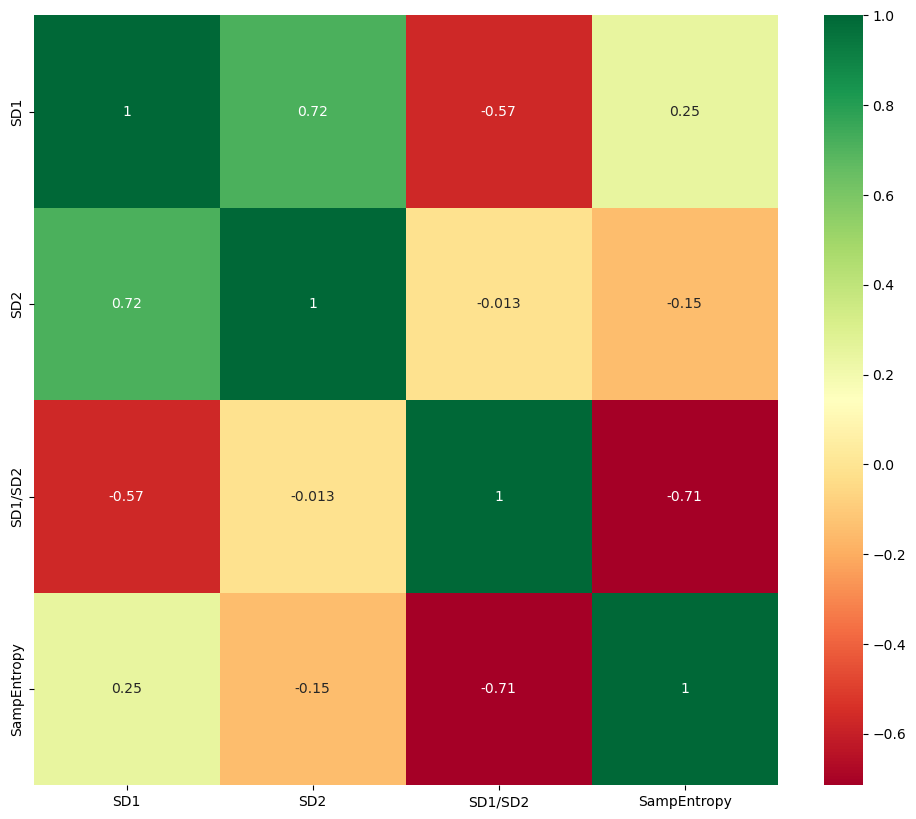

In [319]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(nonlinear.corr(),annot=True,cmap="RdYlGn")

In [320]:
# EXTRATING THE BEST FEATURES FROM EACH EMOTION

In [ ]:
# LOW APPROUCH POSTIVE  EMOTION

In [681]:
L.iloc[:,1:-1]

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,...,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy
2,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,28.937729,...,8.515669,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774
11,206.0,865.558252,69.699199,5.265377,34.141463,63.302557,43.112162,26.389698,22.926829,63.902439,...,8.584618,9.208802,34.883054,65.116946,0.535699,17883.643876,30.483805,83.829865,2.749980,1.400088
26,244.0,731.049180,82.231530,3.553502,17.090535,32.634364,22.257842,14.288643,3.292181,31.275720,...,8.545086,9.142005,35.504891,64.495109,0.550505,16954.872039,15.738668,43.328262,2.752981,1.553938
29,197.0,905.791878,66.465394,3.904720,44.892857,52.682165,51.883455,26.076687,38.775510,83.163265,...,8.561939,9.217563,34.172345,65.827655,0.519118,17852.409641,36.684098,64.498141,1.758204,1.448598
35,189.0,943.010582,63.942715,4.519494,34.180851,66.800273,45.384879,29.936997,19.148936,59.574468,...,8.584021,9.208045,34.886678,65.113322,0.535784,17872.023595,32.091952,88.655830,2.762556,1.364839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,201.0,890.472637,67.595670,3.976633,28.140000,48.815372,34.254635,19.581562,15.000000,61.500000,...,8.574036,9.192438,35.014499,64.985501,0.538805,17654.867380,24.216911,64.165791,2.649627,1.650065
539,240.0,743.300000,80.929787,4.115169,21.786611,37.992644,27.919715,17.496712,7.112971,45.606695,...,8.535619,9.168026,34.696505,65.303495,0.531312,17162.611935,19.741771,49.909407,2.528112,1.562693
548,217.0,822.142857,73.487764,6.255206,29.953704,67.396923,38.129045,23.647168,16.666667,58.796296,...,8.569041,9.184541,35.080545,64.919455,0.540370,17549.681864,26.960683,91.353911,3.388412,1.399874
551,191.0,932.743455,64.460106,3.013400,25.752632,41.733517,31.796143,18.698580,7.894737,56.842105,...,8.587345,9.183853,35.514302,64.485698,0.550731,17647.962602,22.483231,54.475198,2.422926,1.501428


In [692]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr



In [762]:
corr_features1 = correlation(L.iloc[:,1:], 0.7)
len(set(corr_features1))

22

In [763]:
corr_features1

{'AutoReg LF/HF',
 'AutoReg LogPower HF',
 'AutoReg LogPower LF',
 'AutoReg LogPower VLF',
 'AutoReg NormPower HF',
 'AutoReg NormPower LF',
 'AutoReg TotPower',
 'HR mean',
 'NNI mean',
 'RMSSD',
 'SD1',
 'SD2',
 'SDNN',
 'SDSD',
 'TRI Index',
 'Welch LF/HF',
 'Welch LogPower HF',
 'Welch LogPower VLF',
 'Welch NormPower HF',
 'Welch TotPower',
 'pnn20',
 'pnn50'}

In [765]:
newL=L.iloc[:,1:].drop(corr_features1,axis=1)
newL

,NNI counter,HR std,NNI diff mean,Welch LogPower LF,Welch NormPower LF,SD1/SD2,SampEntropy,Label
2,274.0,4.418761,15.260073,5.151501,43.746070,2.981966,1.549774,308.0
11,206.0,5.265377,34.141463,7.449614,64.207018,2.749980,1.400088,308.0
26,244.0,3.553502,17.090535,6.193538,63.294161,2.752981,1.553938,308.0
29,197.0,3.904720,44.892857,6.708784,43.713527,1.758204,1.448598,308.0
35,189.0,4.519494,34.180851,7.978727,82.087352,2.762556,1.364839,308.0
...,...,...,...,...,...,...,...,...
536,201.0,3.976633,28.140000,6.646091,67.086859,2.649627,1.650065,308.0
539,240.0,4.115169,21.786611,6.035346,61.074065,2.528112,1.562693,308.0
548,217.0,6.255206,29.953704,7.554252,73.488064,3.388412,1.399874,308.0
551,191.0,3.013400,25.752632,5.594719,59.736797,2.422926,1.501428,308.0


In [775]:
newL.isnull().sum()

NNI counter           0
HR std                0
NNI diff mean         0
Welch LogPower LF     0
Welch NormPower LF    0
SD1/SD2               0
SampEntropy           0
Label                 0
dtype: int64

In [718]:
# HIGH APPROACH POSTIVE EMOTION 

In [766]:
H.iloc[:,1:]

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
14,286.0,625.611888,96.009236,3.128001,7.540351,20.720523,9.853844,6.354766,0.000000,5.614035,...,9.074489,35.883906,64.116094,0.559671,16026.338190,6.967684,28.355258,4.069538,1.113851,309.0
23,254.0,700.401575,85.850837,4.007949,11.201581,32.646692,14.296134,8.900401,0.000000,13.833992,...,9.109994,35.737543,64.262457,0.556119,16522.707338,10.108838,45.045453,4.456047,1.179976,309.0
32,224.0,798.566964,75.377255,4.295706,21.219731,45.461016,26.273313,15.527110,4.035874,46.636771,...,9.130536,35.560137,64.439863,0.551834,16814.174821,18.577465,61.134102,3.290767,1.552087,309.0
50,148.0,758.612686,50.842676,7.595670,23.014952,52.880231,30.888640,19.698328,8.974359,88.435374,...,9.147733,33.719711,66.280289,0.508744,16987.990336,21.841106,70.490117,1.432337,1.453736,309.0
59,190.0,935.994737,64.830087,7.185914,54.994709,95.973734,69.786977,43.076935,45.502646,76.190476,...,9.229074,34.183251,65.816749,0.519370,18023.882666,49.346545,125.577578,2.544810,1.563145,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,157.0,758.612686,53.354395,3.901464,23.014952,69.595768,30.888640,19.698328,8.974359,79.487179,...,9.261140,34.354426,65.645574,0.523332,18645.507373,21.841106,78.431440,1.325284,1.854560,309.0
518,273.0,655.413919,92.280510,8.226540,22.169118,59.085003,29.563615,19.594621,7.352941,40.808824,...,9.100027,36.797247,63.202753,0.582210,16651.688478,20.904423,80.826379,3.866473,1.160664,309.0
530,213.0,838.737089,72.116552,6.580292,43.877358,74.714907,58.754687,39.167934,28.301887,68.396226,...,9.211082,34.487858,65.512142,0.526435,17810.778312,41.545717,97.141393,2.338181,1.483024,309.0
533,261.0,684.126437,87.869295,3.778533,11.242308,30.260715,14.897470,9.793571,1.153846,13.076923,...,9.105143,36.021762,63.978238,0.563031,16523.071315,10.534043,41.457790,3.935601,1.243090,309.0


In [767]:
corr_features2 = correlation(H.iloc[:,1:], 0.7)
len(set(corr_features2))

25

In [768]:
corr_features2

{'AutoReg LF/HF',
 'AutoReg LogPower HF',
 'AutoReg LogPower LF',
 'AutoReg LogPower VLF',
 'AutoReg NormPower HF',
 'AutoReg NormPower LF',
 'AutoReg TotPower',
 'HR mean',
 'NNI diff mean',
 'NNI mean',
 'RMSSD',
 'SD1',
 'SD1/SD2',
 'SD2',
 'SDNN',
 'SDSD',
 'TRI Index',
 'Welch LF/HF',
 'Welch LogPower HF',
 'Welch LogPower LF',
 'Welch LogPower VLF',
 'Welch NormPower HF',
 'Welch TotPower',
 'pnn20',
 'pnn50'}

In [769]:
newH=H.iloc[:,1:].drop(corr_features2,axis=1)
newH

,NNI counter,HR std,Welch NormPower LF,SampEntropy,Label
14,286.0,3.128001,84.665821,1.113851,309.0
23,254.0,4.007949,90.734676,1.179976,309.0
32,224.0,4.295706,84.360454,1.552087,309.0
50,148.0,7.595670,26.840554,1.453736,309.0
59,190.0,7.185914,61.360645,1.563145,309.0
...,...,...,...,...,...
509,157.0,3.901464,49.148384,1.854560,309.0
518,273.0,8.226540,85.599328,1.160664,309.0
530,213.0,6.580292,72.103786,1.483024,309.0
533,261.0,3.778533,86.475241,1.243090,309.0


In [774]:
newH.isnull().sum()

NNI counter           0
HR std                0
Welch NormPower LF    0
SampEntropy           0
Label                 0
dtype: int64

In [723]:
# NEUTRAL STATE

In [770]:
N.iloc[:,1:]

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
5,259.0,688.104247,87.420981,4.390448,17.329457,35.476719,21.703517,13.091863,1.937984,36.046512,...,9.106751,35.660537,64.339463,0.554256,16464.842055,15.346615,47.650262,3.104936,1.584965,108.0
8,194.0,922.541237,65.333858,4.453019,32.341969,61.869165,40.365172,24.215335,21.761658,62.694301,...,9.196857,35.143881,64.856119,0.541875,17745.074062,28.542276,82.648220,2.895642,1.912387,108.0
17,234.0,763.341880,78.779441,3.708727,21.175966,36.825225,26.254940,15.554380,3.862661,47.639485,...,9.137266,35.428272,64.571728,0.548665,16872.469027,18.564879,48.525225,2.613819,1.678964,108.0
20,231.0,772.264069,77.845396,3.431201,19.500000,34.411505,24.134857,14.252174,2.173913,44.347826,...,9.129831,35.624280,64.375720,0.553381,16829.461757,17.062983,45.118774,2.644249,1.662548,108.0
38,248.0,720.697581,83.463891,4.215374,20.870445,36.374921,25.925227,15.411148,6.477733,44.129555,...,9.135383,35.195390,64.804610,0.543100,16761.852031,18.331741,47.938325,2.615045,1.686399,108.0
41,274.0,652.846715,92.038598,3.452284,12.611722,25.367451,16.967864,11.372187,1.098901,18.315018,...,9.108393,35.840722,64.159278,0.558621,16502.165266,11.997667,33.747659,2.812852,1.362552,108.0
53,206.0,865.907767,69.469121,3.562136,28.156098,43.521637,34.638763,20.225567,16.585366,54.634146,...,9.188411,34.963574,65.036426,0.537600,17572.761016,24.493295,56.464541,2.305306,1.760011,108.0
56,208.0,856.605769,70.216832,3.504828,22.222222,42.557587,27.798968,16.742449,7.729469,43.478261,...,9.152085,35.567359,64.432641,0.552008,17164.124339,19.656834,56.736766,2.886363,1.609438,108.0
65,261.0,684.356322,87.732074,2.284354,9.238462,17.606365,11.629869,7.077949,0.000000,7.692308,...,9.111239,35.551818,64.448182,0.551634,16499.074641,8.223530,23.497472,2.857346,1.478353,108.0
74,246.0,725.483740,82.835315,3.334073,16.273469,28.871951,20.818849,13.011136,2.857143,28.979592,...,9.113619,35.626869,64.373131,0.553443,16555.726045,14.720525,37.893630,2.574204,1.458120,108.0


In [728]:
corr_features3 = correlation(N.iloc[:,1:-1], 0.70)
len(set(corr_features3))

22

In [771]:
corr_features3

{'AutoReg LF/HF',
 'AutoReg LogPower HF',
 'AutoReg LogPower LF',
 'AutoReg LogPower VLF',
 'AutoReg NormPower HF',
 'AutoReg NormPower LF',
 'AutoReg TotPower',
 'HR mean',
 'NNI mean',
 'RMSSD',
 'SD1',
 'SD2',
 'SDNN',
 'SDSD',
 'TRI Index',
 'Welch LF/HF',
 'Welch LogPower HF',
 'Welch LogPower LF',
 'Welch NormPower HF',
 'Welch TotPower',
 'pnn20',
 'pnn50'}

In [772]:
newN=N.iloc[:,1:].drop(corr_features3,axis=1)
newN

,NNI counter,HR std,NNI diff mean,Welch LogPower VLF,Welch NormPower LF,SD1/SD2,SampEntropy,Label
5,259.0,4.390448,17.329457,5.369432,88.828090,3.104936,1.584965,108.0
8,194.0,4.453019,32.341969,7.920753,67.887838,2.895642,1.912387,108.0
17,234.0,3.708727,21.175966,7.001451,66.790443,2.613819,1.678964,108.0
20,231.0,3.431201,19.500000,5.633060,66.301762,2.644249,1.662548,108.0
38,248.0,4.215374,20.870445,6.307575,72.899220,2.615045,1.686399,108.0
41,274.0,3.452284,12.611722,4.056592,76.159717,2.812852,1.362552,108.0
53,206.0,3.562136,28.156098,6.366699,63.165576,2.305306,1.760011,108.0
56,208.0,3.504828,22.222222,7.042422,75.596944,2.886363,1.609438,108.0
65,261.0,2.284354,9.238462,6.767175,64.984143,2.857346,1.478353,108.0
74,246.0,3.334073,16.273469,5.639970,70.584719,2.574204,1.458120,108.0


In [773]:
newN.isnull().sum()

NNI counter           0
HR std                0
NNI diff mean         0
Welch LogPower VLF    0
Welch NormPower LF    0
SD1/SD2               0
SampEntropy           0
Label                 0
dtype: int64

In [805]:
newL

,NNI counter,HR std,NNI diff mean,Welch LogPower LF,Welch NormPower LF,SD1/SD2,SampEntropy,Label
2,274.0,4.418761,15.260073,5.151501,43.746070,2.981966,1.549774,308.0
11,206.0,5.265377,34.141463,7.449614,64.207018,2.749980,1.400088,308.0
26,244.0,3.553502,17.090535,6.193538,63.294161,2.752981,1.553938,308.0
29,197.0,3.904720,44.892857,6.708784,43.713527,1.758204,1.448598,308.0
35,189.0,4.519494,34.180851,7.978727,82.087352,2.762556,1.364839,308.0
...,...,...,...,...,...,...,...,...
536,201.0,3.976633,28.140000,6.646091,67.086859,2.649627,1.650065,308.0
539,240.0,4.115169,21.786611,6.035346,61.074065,2.528112,1.562693,308.0
548,217.0,6.255206,29.953704,7.554252,73.488064,3.388412,1.399874,308.0
551,191.0,3.013400,25.752632,5.594719,59.736797,2.422926,1.501428,308.0


In [735]:
# FEATURE SELECTION 

In [806]:
df

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1.0,472.0,633.067797,95.111328,5.596500,14.685775,38.126336,19.698201,13.142063,1.910828,...,9.060048,35.557355,64.442645,0.551767,15674.539755,13.928721,52.054050,3.737174,1.196584,-1.0
1,1.0,282.0,633.797872,94.957639,5.295495,15.437722,34.964419,19.589561,12.080853,1.067616,...,9.108754,35.414741,64.585259,0.548341,16393.972788,13.851732,47.446242,3.425293,1.391884,208.0
2,1.0,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774,308.0
3,2.0,438.0,682.826484,88.128099,4.771772,16.157895,37.144495,20.816458,13.139347,2.059497,...,9.060304,36.066585,63.933415,0.564127,15815.174364,14.719457,50.414864,3.425049,1.435334,-1.0
4,2.0,268.0,666.746269,90.255192,4.875405,15.198502,36.593564,19.099385,11.588573,1.123596,...,9.121223,35.383463,64.616537,0.547591,16590.789950,13.500916,49.575219,3.671989,1.423566,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,185.0,347.0,515.818444,79.276563,7.384019,11.962428,37.752447,23.626856,20.404213,1.734104,...,9.105778,34.654331,65.345669,0.530323,16147.875484,16.706709,50.518112,3.023822,0.906509,208.0
554,185.0,324.0,550.521605,109.223667,4.937727,13.167183,26.510752,17.750856,11.923015,1.547988,...,9.094684,35.006366,64.993634,0.538612,16082.202403,12.551746,35.237809,2.807403,1.118727,309.0
555,186.0,390.0,764.643590,78.587904,3.107465,14.753213,29.648908,18.342430,10.913000,0.514139,...,9.075834,35.652062,64.347938,0.554051,15954.796546,12.969918,39.699427,3.060885,1.588712,-1.0
556,186.0,232.0,766.500000,78.477504,4.015693,15.614719,38.337192,19.157018,11.122384,0.865801,...,9.157152,35.052305,64.947695,0.539701,17076.379939,13.544685,52.275968,3.859519,1.304293,209.0


In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr



In [820]:
corr_features = correlation(df.iloc[:,:-1], 0.70)
len(set(corr_features))

20

In [821]:
corr_features

{'AutoReg LF/HF',
 'AutoReg LogPower HF',
 'AutoReg LogPower LF',
 'AutoReg LogPower VLF',
 'AutoReg NormPower HF',
 'AutoReg NormPower LF',
 'AutoReg TotPower',
 'HR mean',
 'RMSSD',
 'SD1',
 'SD2',
 'SDSD',
 'TRI Index',
 'Welch LF/HF',
 'Welch LogPower HF',
 'Welch LogPower VLF',
 'Welch NormPower HF',
 'Welch TotPower',
 'pnn20',
 'pnn50'}

In [938]:
newdf=df.iloc[:,:].drop(corr_features,axis=1)
newdf.iloc[:,:]

,Patien ID,NNI counter,NNI mean,HR std,NNI diff mean,SDNN,Welch LogPower LF,Welch NormPower LF,SD1/SD2,SampEntropy,Label
0,1.0,472.0,633.067797,5.596500,14.685775,38.126336,5.954668,61.625379,3.737174,1.196584,-1.0
1,1.0,282.0,633.797872,5.295495,15.437722,34.964419,5.074719,34.207098,3.425293,1.391884,208.0
2,1.0,274.0,653.729927,4.418761,15.260073,32.661771,5.151501,43.746070,2.981966,1.549774,308.0
3,2.0,438.0,682.826484,4.771772,16.157895,37.144495,7.055840,81.493089,3.425049,1.435334,-1.0
4,2.0,268.0,666.746269,4.875405,15.198502,36.593564,6.282032,78.543668,3.671989,1.423566,208.0
...,...,...,...,...,...,...,...,...,...,...,...
553,185.0,347.0,515.818444,7.384019,11.962428,37.752447,5.007871,53.854638,3.023822,0.906509,208.0
554,185.0,324.0,550.521605,4.937727,13.167183,26.510752,5.177652,50.881056,2.807403,1.118727,309.0
555,186.0,390.0,764.643590,3.107465,14.753213,29.648908,5.458078,59.985553,3.060885,1.588712,-1.0
556,186.0,232.0,766.500000,4.015693,15.614719,38.337192,4.868971,43.228796,3.859519,1.304293,209.0


In [ ]:
# FEATURE SCALING

In [971]:

minmaxscaler = MinMaxScaler(feature_range=(0,1))
scaled_df = minmaxscaler.fit_transform(newdf.iloc[:,1:-1])
x['Patien ID']=newdf.iloc[:,0:1]
x= pd.DataFrame(newdf.iloc[:,0:1])
x[newdf.iloc[:,1:-1].columns]=newdf.iloc[:,1:-1]
y= pd.DataFrame(newdf.iloc[:,-1:])


In [853]:
# Feature selection 

In [866]:
from sklearn.feature_selection import SelectFromModel

In [946]:
from sklearn.ensemble import ExtraTreesClassifier

In [947]:
clf = ExtraTreesClassifier(n_estimators=50).fit(x,y)

/var/folders/tx/thqjy9l967l8bpqhyd8xsvjr0000gn/T/ipykernel_17524/3473579.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = ExtraTreesClassifier(n_estimators=50).fit(x,y)


In [948]:
model = SelectFromModel(clf,threshold = "median", prefit=True)

In [949]:
# To visualize the selected features we can use get_support()
model.get_support()

array([False,  True,  True,  True, False,  True, False, False, False,
        True])

In [950]:
# To know the name of the selected features
newdf.iloc[:,0:-1].columns[model.get_support()==True]

Index(['NNI counter', 'NNI mean', 'HR std', 'SDNN', 'SampEntropy'], dtype='object')

In [973]:
features_DT = pd.DataFrame({'Feature':list(newdf.iloc[:,0:-1].columns),'Ranking':clf.feature_importances_})
best=features_DT.sort_values(by='Ranking',ascending=False)
bestfeatures=best['Feature'].values[:7]
x1=x[bestfeatures]
print(len(bestfeatures))
bestfeatures

7


array(['NNI counter', 'NNI mean', 'SampEntropy', 'HR std', 'SDNN',
       'SD1/SD2', 'Welch LogPower LF'], dtype=object)

In [967]:
np.median(clf.feature_importances_)

0.07543438302651302

In [968]:
etc_X = model.transform(X_train)
etc_X.shape

/Users/luigitesta/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(418, 5)

In [ ]:
# Building the model

In [969]:
from sklearn.model_selection import train_test_split 

In [957]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=0)